# 1. Loading dataset and checking data quality

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data1 = pd.read_csv(r'C:\Users\siddh\Desktop\Syneptic Assignment\case_study1.csv')
data2 = pd.read_csv(r'C:\Users\siddh\Desktop\Syneptic Assignment\case_study2.csv')

In [3]:
#this data has aggregated data on trades at a prospect ID level
data1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [4]:
# This file has payments, delinquency info and customer level flags
data2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,delinquent_flag,30_DPD_F3M,BOUNCE_F3M
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,13.333,1,0,PL,PL,Yes,0,1
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,No,0,0
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,5741.667,1,0,ConsumerLoan,others,Yes,0,0
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,9.900,0,0,others,others,No,0,1
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,-99999.000,0,0,AL,AL,No,0,1


In [5]:
print("Number of records in data1 : ",data1.shape[0])
print("Number of features in data1 : ",data1.shape[1])
print("Number of unique Prospect IDs in data1 : ",data1['PROSPECTID'].nunique())


Number of records in data1 :  51336
Number of features in data1 :  26
Number of unique Prospect IDs in data1 :  51336


In [6]:
print("Number of records in data2 : ",data2.shape[0])
print("Number of features in data2 : ",data2.shape[1])
print("Number of unique Prospect IDs in data2 : ",data2['PROSPECTID'].nunique())

Number of records in data2 :  51336
Number of features in data2 :  63
Number of unique Prospect IDs in data2 :  51336


### Missing values check

In [7]:
data1.isnull().sum(axis = 1).sum()

0

In [8]:
data2.isnull().sum(axis = 1).sum()

0

### Merging datas together

In [9]:
full_data = pd.merge(data1, data2, on = ['PROSPECTID'], how='inner' )
print("Data shape after merging - ", full_data.shape)

Data shape after merging -  (51336, 88)


In [10]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51336 entries, 0 to 51335
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   Total_TL                      51336 non-null  int64  
 2   Tot_Closed_TL                 51336 non-null  int64  
 3   Tot_Active_TL                 51336 non-null  int64  
 4   Total_TL_opened_L6M           51336 non-null  int64  
 5   Tot_TL_closed_L6M             51336 non-null  int64  
 6   pct_tl_open_L6M               51336 non-null  float64
 7   pct_tl_closed_L6M             51336 non-null  float64
 8   pct_active_tl                 51336 non-null  float64
 9   pct_closed_tl                 51336 non-null  float64
 10  Total_TL_opened_L12M          51336 non-null  int64  
 11  Tot_TL_closed_L12M            51336 non-null  int64  
 12  pct_tl_open_L12M              51336 non-null  float64
 13  p

In [11]:
# Primary key set as index 
full_data.set_index('PROSPECTID',inplace=True)

# 2. EDA

### Event rates check

In [12]:
print(full_data['30_DPD_F3M'].value_counts()/full_data['30_DPD_F3M'].count())
print("-"*65)
print("Event rate for the 30_DPD_F3M DV is very low. Needs to balanced")

0    0.965268
1    0.034732
Name: 30_DPD_F3M, dtype: float64
-----------------------------------------------------------------
Event rate for the 30_DPD_F3M DV is very low. Needs to balanced


In [13]:
print(full_data['BOUNCE_F3M'].value_counts()/full_data['BOUNCE_F3M'].count())
print("-"*65)
print("Event rate for the BOUNCE_F3M DV is high enough. Doesn't require any sampling")

0    0.757539
1    0.242461
Name: BOUNCE_F3M, dtype: float64
-----------------------------------------------------------------
Event rate for the BOUNCE_F3M DV is high enough. Doesn't require any sampling


### Isolating Numeric & categorical Variables 

In [14]:
# isolating the continuous variables 
num_var_list = list(full_data.select_dtypes(exclude=['object']).drop(['30_DPD_F3M','BOUNCE_F3M'],axis = 1).columns.values)
num_var_list[:5]

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M']

In [15]:
# isolating the categorical variables 
cat_var_list = list(full_data.select_dtypes(include=['object']).columns.values)
cat_var_list

['MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'last_prod_enq2',
 'first_prod_enq2',
 'delinquent_flag']

### Categorical features exploration

In [16]:
for col in cat_var_list:
    print("Unique values in the feature ",col," :")
    print(full_data[col].unique())
    print("\n")

Unique values in the feature  MARITALSTATUS  :
['Married' 'Single']


Unique values in the feature  EDUCATION  :
['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL']


Unique values in the feature  GENDER  :
['M' 'F']


Unique values in the feature  last_prod_enq2  :
['PL' 'ConsumerLoan' 'others' 'AL' 'CC' 'HL']


Unique values in the feature  first_prod_enq2  :
['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']


Unique values in the feature  delinquent_flag  :
['Yes' 'No']




### Function to automate count plot

In [17]:
def cat_plots(idat, col, target = "BOUNCE_F3M"):
    print("Countplot for ",col, " split by ", target)
    print("\n")
    plt.figure(figsize=(15, 5))
    sns.countplot(x=col, data=full_data, hue=target)
    plt.show()

### Count plots split by  BOUNCE_F3M

Countplot for  MARITALSTATUS  split by  BOUNCE_F3M




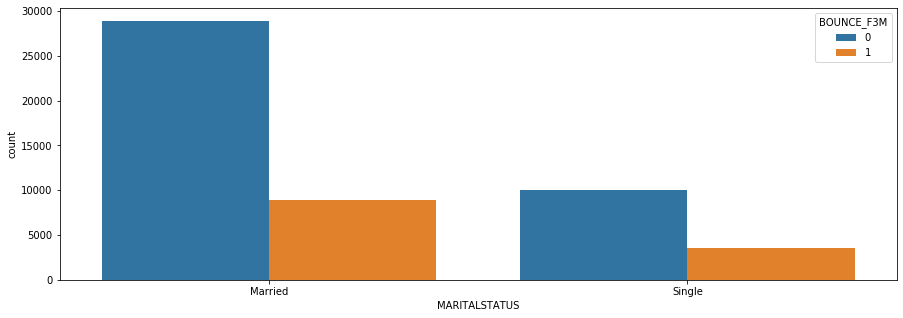

Countplot for  EDUCATION  split by  BOUNCE_F3M




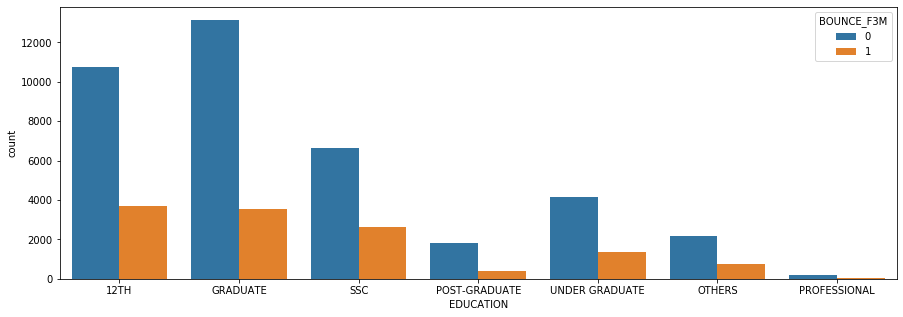

Countplot for  GENDER  split by  BOUNCE_F3M




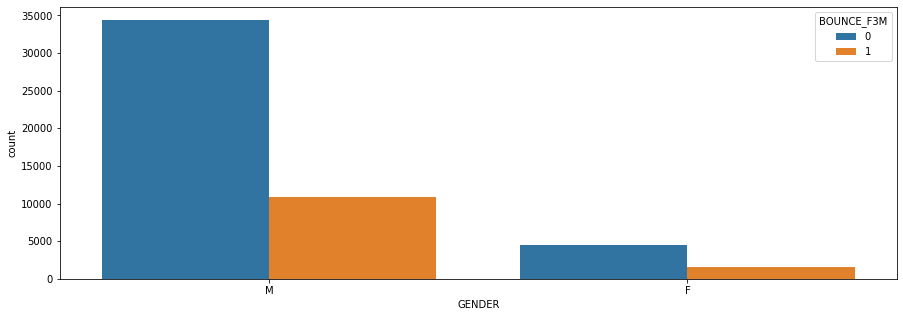

Countplot for  last_prod_enq2  split by  BOUNCE_F3M




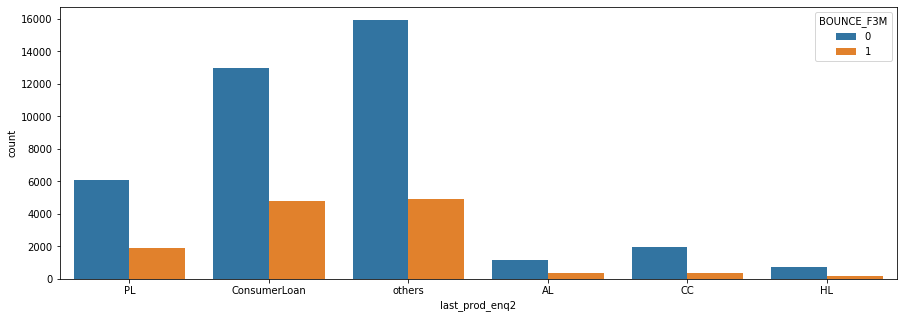

Countplot for  first_prod_enq2  split by  BOUNCE_F3M




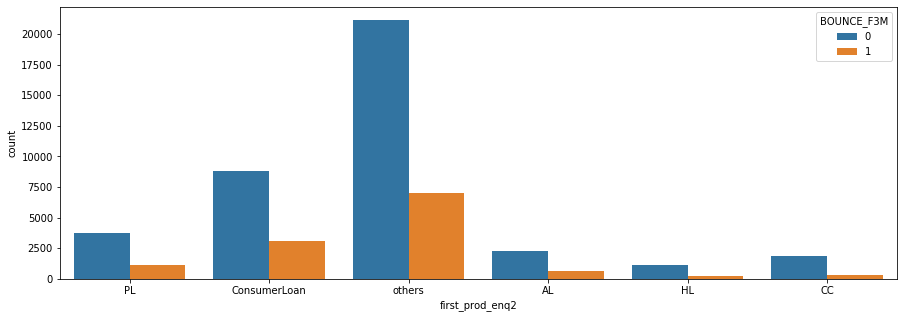

Countplot for  delinquent_flag  split by  BOUNCE_F3M




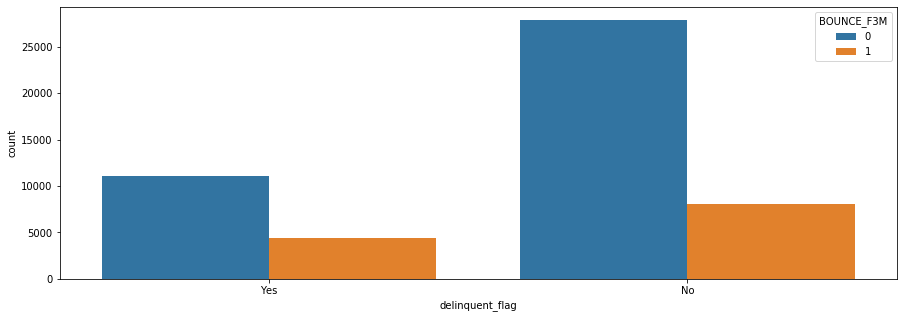

In [18]:
#########################################################################################
######################## Count plots split by  BOUNCE_F3M ###############################
#########################################################################################

for cl in cat_var_list:
    cat_plots(full_data,cl,"BOUNCE_F3M")

### Count plots split by  BOUNCE_F3M

Countplot for  MARITALSTATUS  split by  30_DPD_F3M




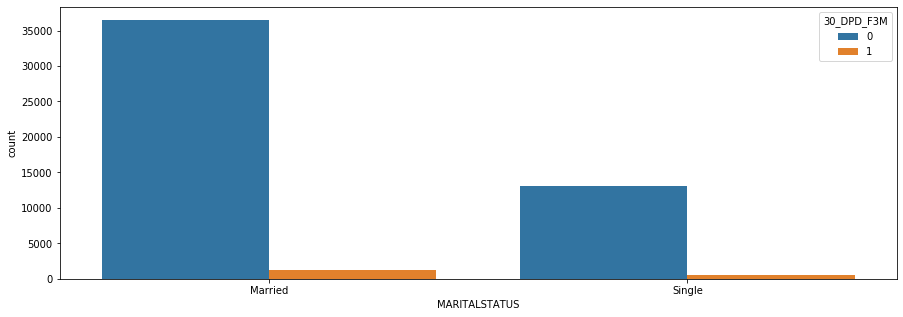

Countplot for  EDUCATION  split by  30_DPD_F3M




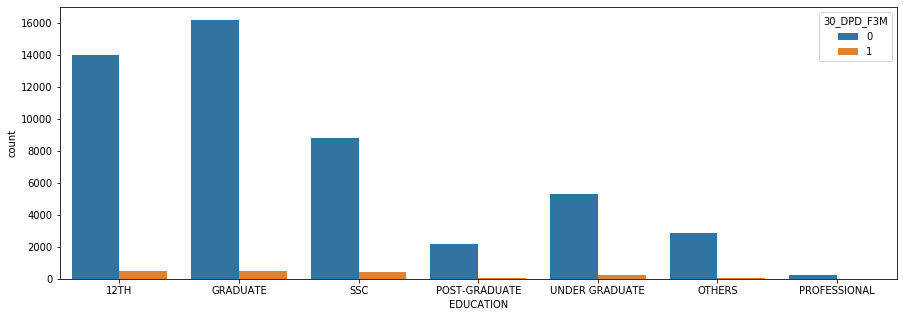

Countplot for  GENDER  split by  30_DPD_F3M




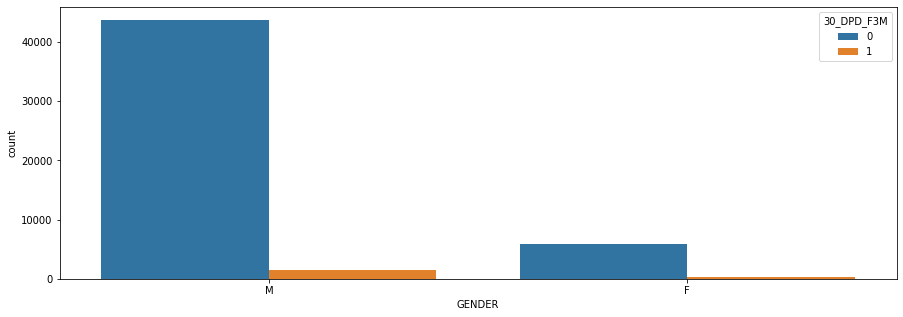

Countplot for  last_prod_enq2  split by  30_DPD_F3M




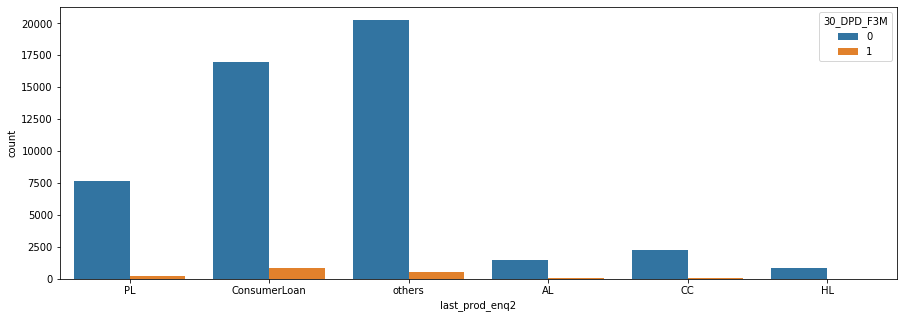

Countplot for  first_prod_enq2  split by  30_DPD_F3M




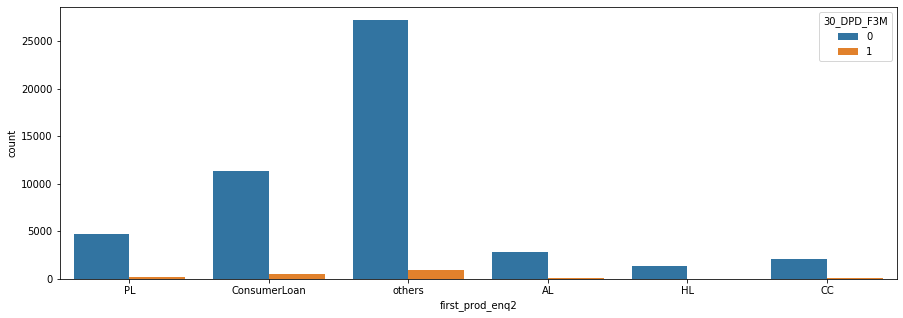

Countplot for  delinquent_flag  split by  30_DPD_F3M




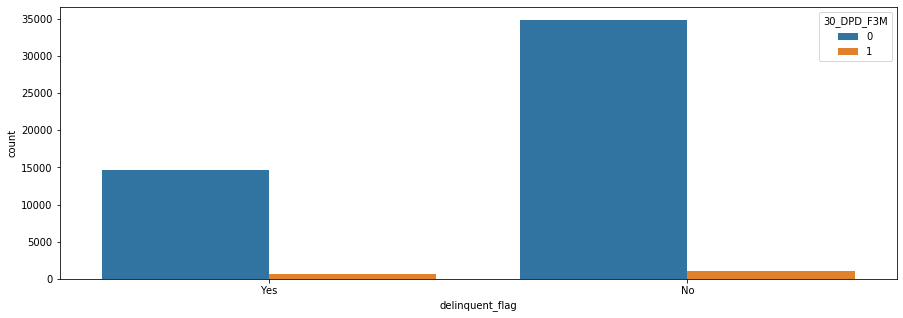

In [19]:
#########################################################################################
######################## Count plots split by  BOUNCE_F3M ###############################
#########################################################################################

for cl in cat_var_list:
    cat_plots(full_data,cl,"30_DPD_F3M")

### Continuous variables exploration

### Descriptive Statistics 

In [20]:
#########################################################################################
########################      Descriptive Statistics      ###############################
#########################################################################################

pd.options.display.max_rows = None
cont_desc_stats = pd.concat([full_data[num_var_list].describe().transpose(),
           full_data[num_var_list].dtypes.rename("type"),
          full_data[num_var_list].nunique().rename("Num_unique_values")],axis=1)

cont_desc_stats

,count,mean,std,min,25%,50%,75%,max,type,Num_unique_values
Total_TL,51336.0,4.858598,7.177116,1.0,1.000,2.000,5.00000,235.000,int64,107
Tot_Closed_TL,51336.0,2.770415,5.941680,0.0,0.000,1.000,3.00000,216.000,int64,100
Tot_Active_TL,51336.0,2.088184,2.290774,0.0,1.000,1.000,3.00000,47.000,int64,32
Total_TL_opened_L6M,51336.0,0.736754,1.296717,0.0,0.000,0.000,1.00000,27.000,int64,20
Tot_TL_closed_L6M,51336.0,0.428919,0.989972,0.0,0.000,0.000,1.00000,19.000,int64,18
pct_tl_open_L6M,51336.0,0.184574,0.297414,0.0,0.000,0.000,0.30800,1.000,float64,283
pct_tl_closed_L6M,51336.0,0.089095,0.205635,0.0,0.000,0.000,0.05300,1.000,float64,253
pct_active_tl,51336.0,0.577542,0.379867,0.0,0.250,0.556,1.00000,1.000,float64,421
pct_closed_tl,51336.0,0.422458,0.379867,0.0,0.000,0.444,0.75000,1.000,float64,421
Total_TL_opened_L12M,51336.0,1.503701,2.119399,0.0,0.000,1.000,2.00000,39.000,int64,34


In [21]:
## Observation - 7 variables have special values of -99999
cont_desc_stats[cont_desc_stats[min] == -99999.0]

,count,mean,std,min,25%,50%,75%,max,type,Num_unique_values
time_since_first_deliquency,51336.0,-70020.091320,45823.312757,-99999.0,-99999.0,-99999.000,8.00000,35.000,int64,37
time_since_recent_deliquency,51336.0,-70022.375838,45819.820741,-99999.0,-99999.0,-99999.000,3.00000,35.000,int64,37
max_delinquency_level,51336.0,-70003.987085,45847.976100,-99999.0,-99999.0,-99999.000,15.00000,900.000,int64,519
max_deliq_6mts,51336.0,-25105.208587,43366.162767,-99999.0,-99999.0,0.000,0.00000,900.000,int64,206
CC_utilization,51336.0,-92791.608990,25861.225129,-99999.0,-99999.0,-99999.000,-99999.00000,71.059,float64,907
PL_utilization,51336.0,-86556.225194,34111.414750,-99999.0,-99999.0,-99999.000,-99999.00000,1.708,float64,918
max_unsec_exposure_inPct,51336.0,-45127.943635,49795.784556,-99999.0,-99999.0,0.333,2.16425,173800.000,float64,8975


PReprocessing the data
distribution plots,
outlier treatment, 
special value treatment
scaling the data

correlation plots
WOE table/IV (optional)

THen build model




### Continuous variable plots

In [22]:
def cont_plots(data, col, target):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    sns.distplot(data[col], ax=axes[0],kde_kws={'bw':0.15}).set_title("Distribution plot")
    sns.boxplot(x=target, y=col, data=full_data).set_title("Box Plot distribution")
    plt.show()


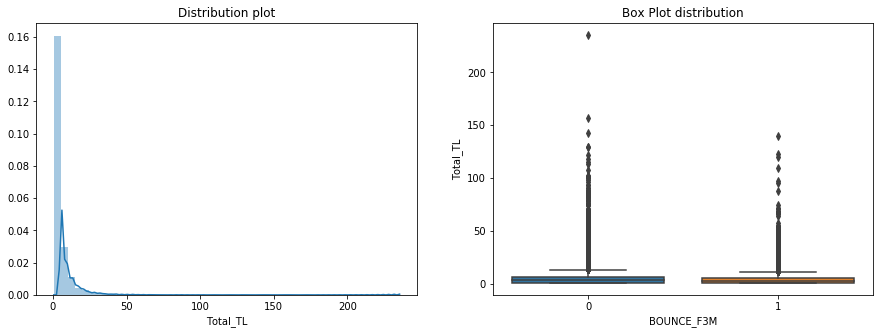

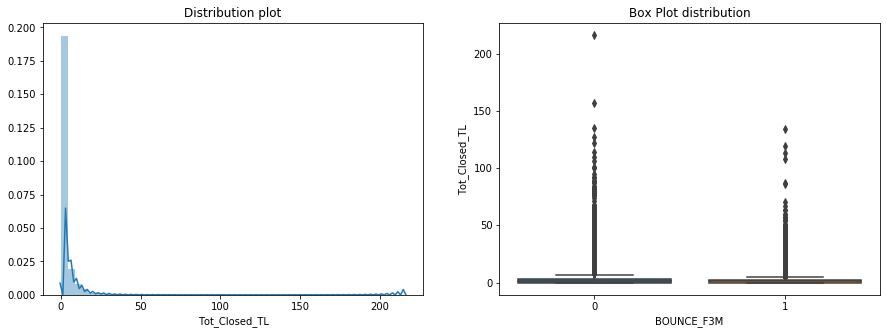

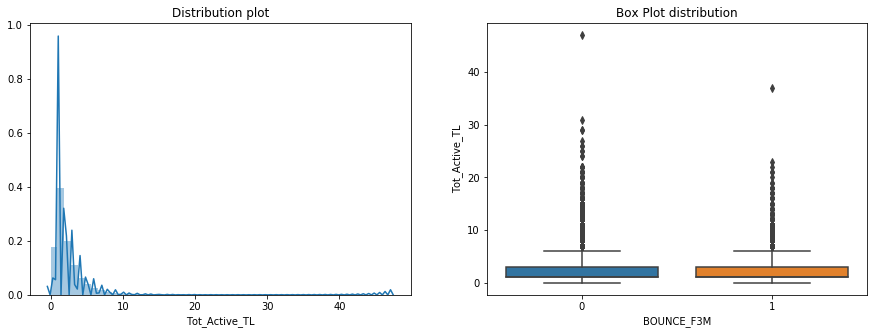

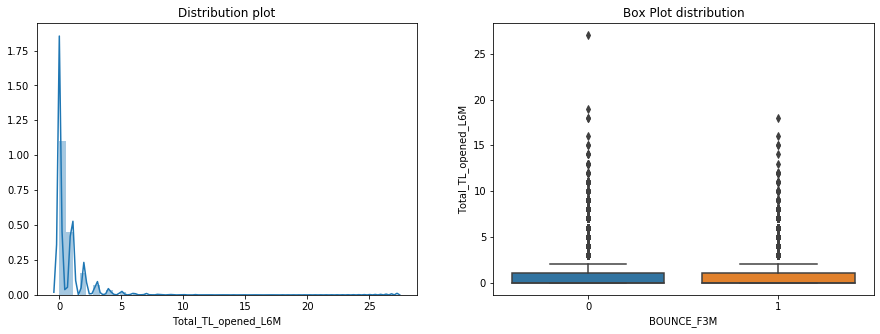

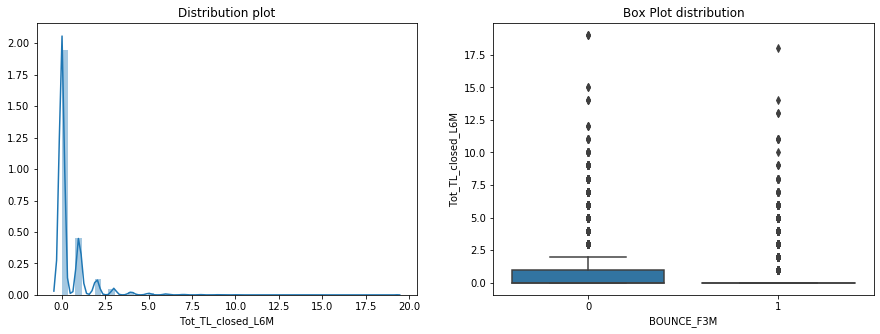

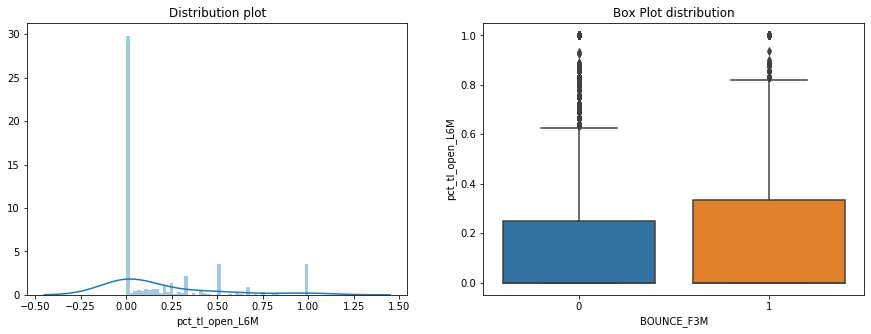

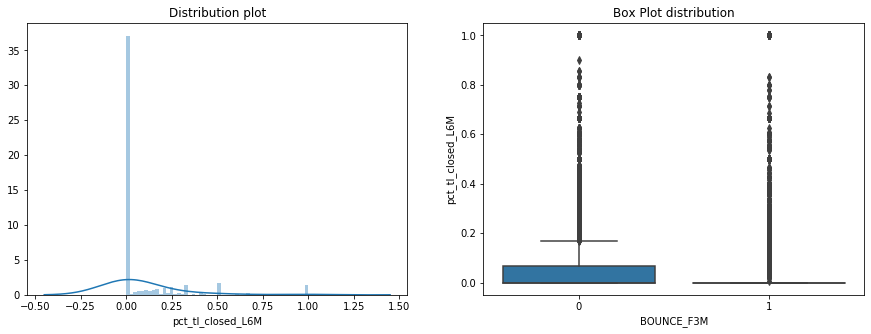

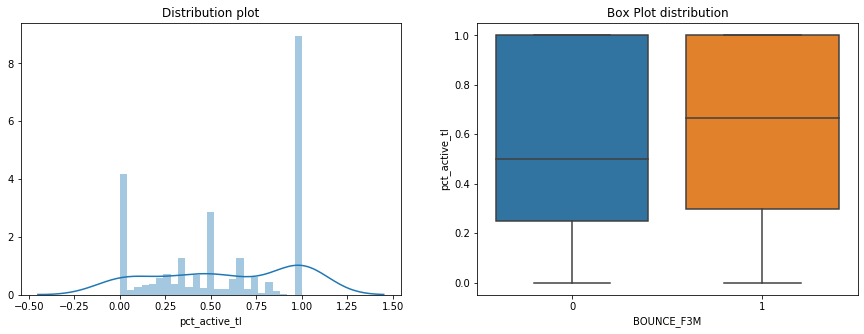

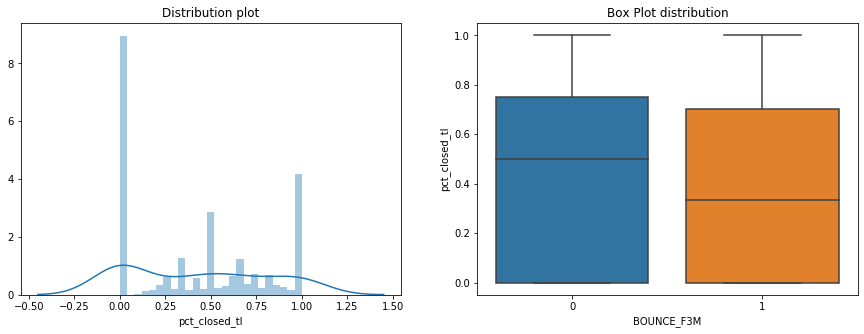

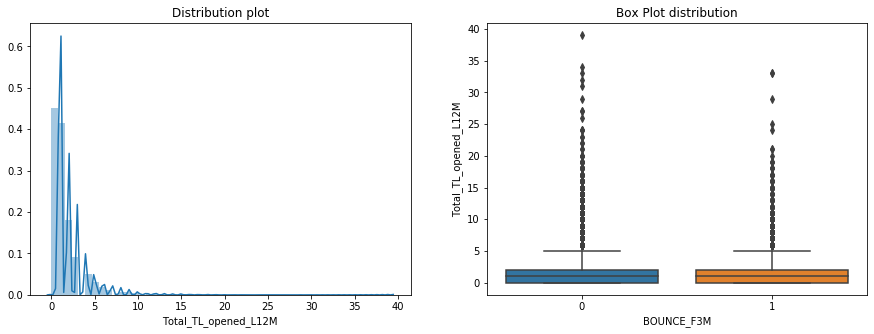

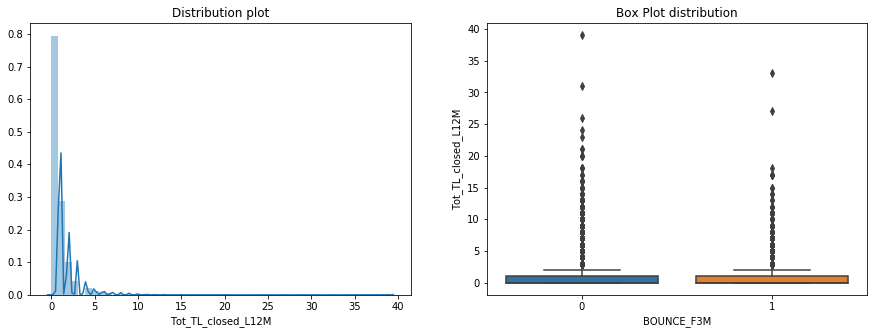

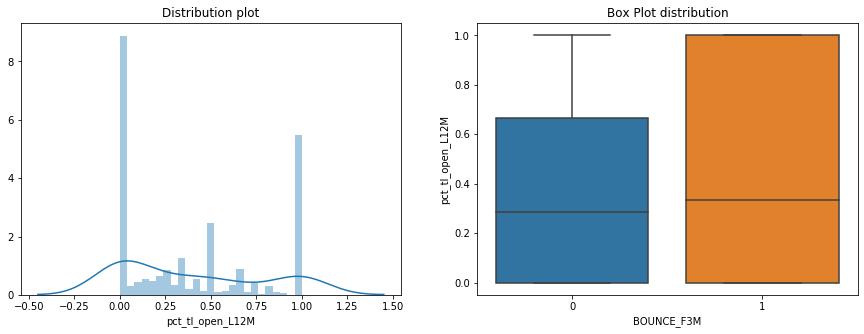

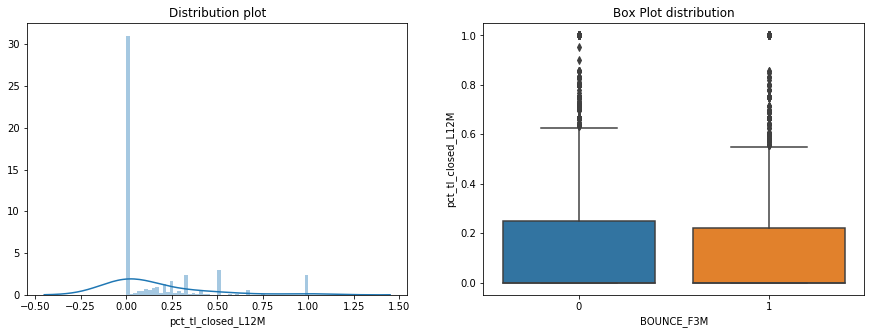

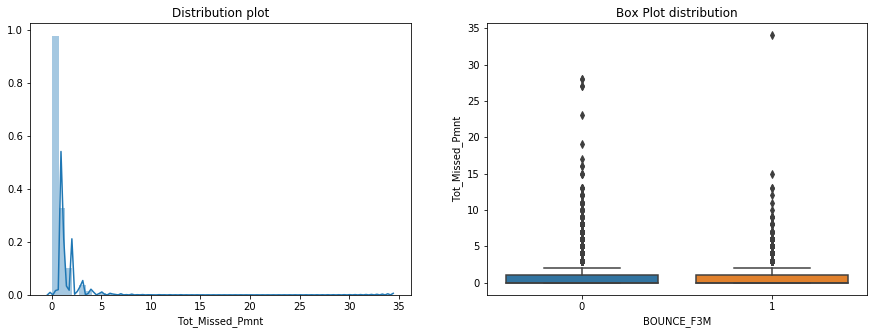

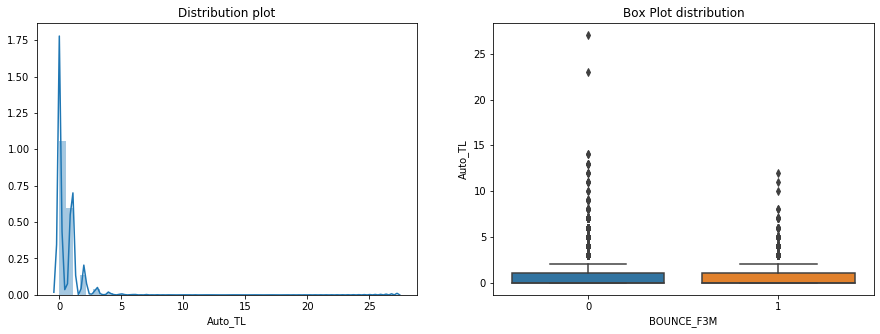

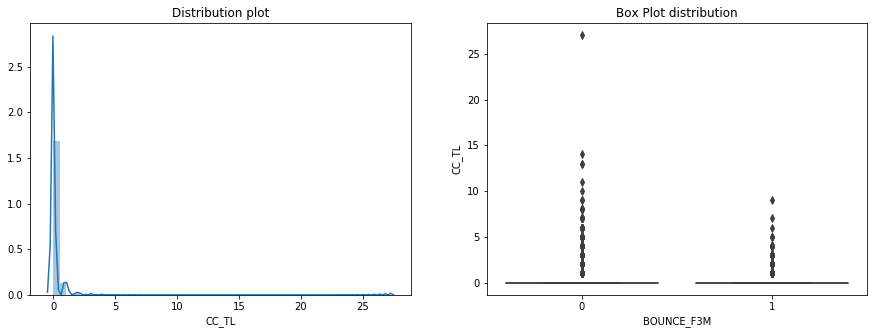

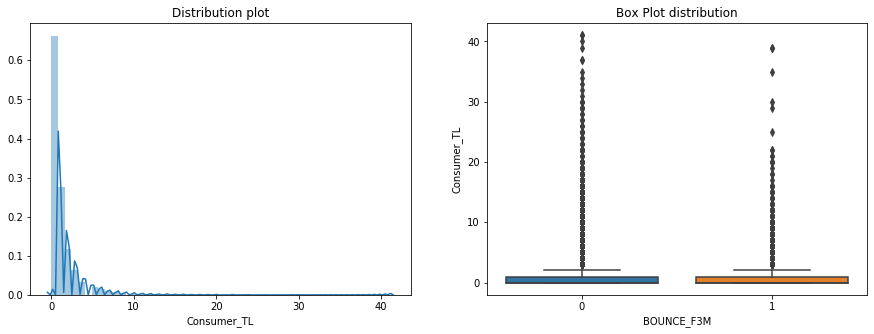

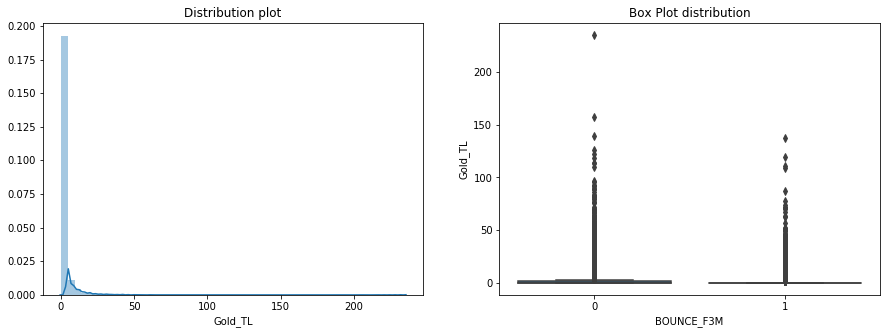

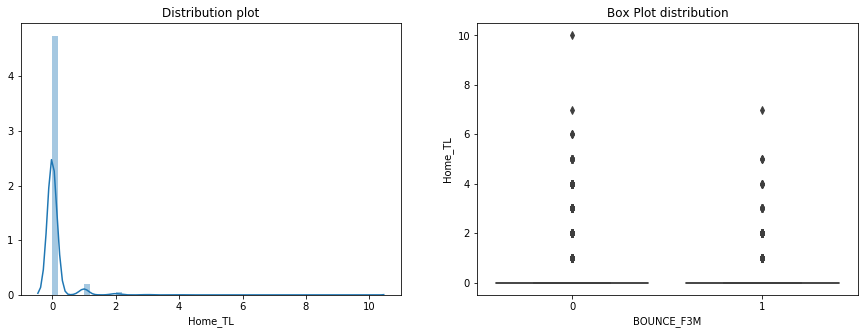

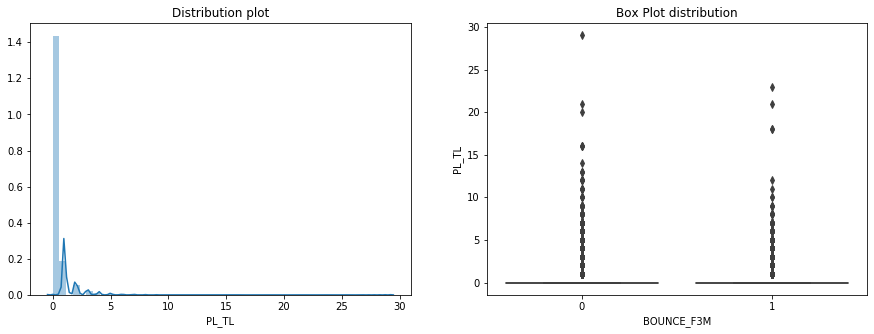

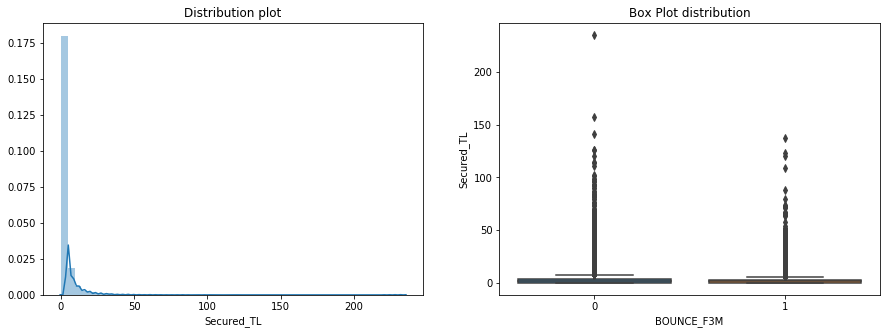

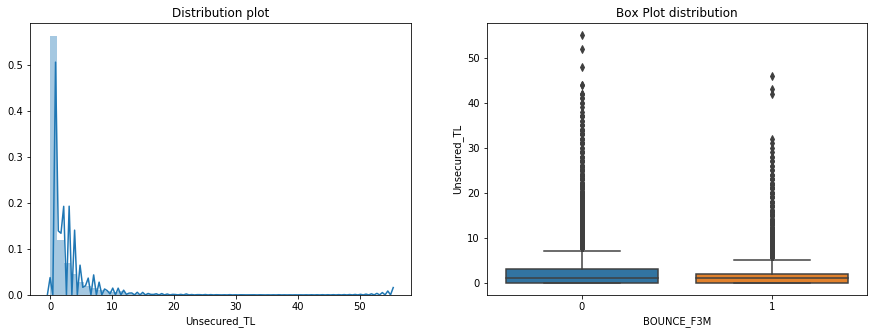

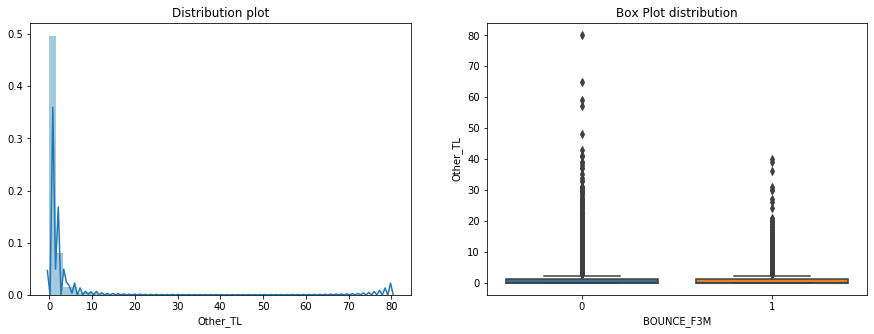

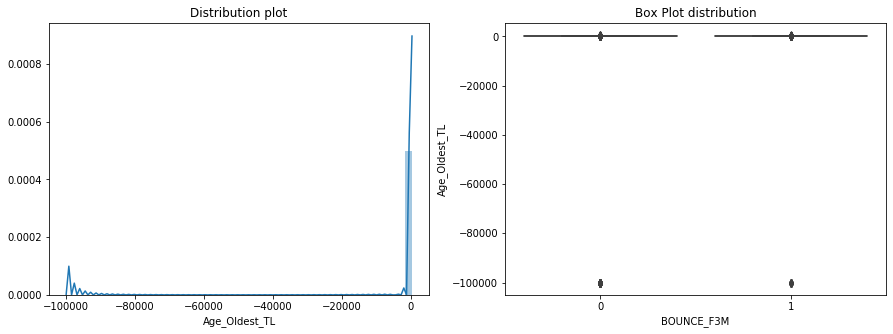

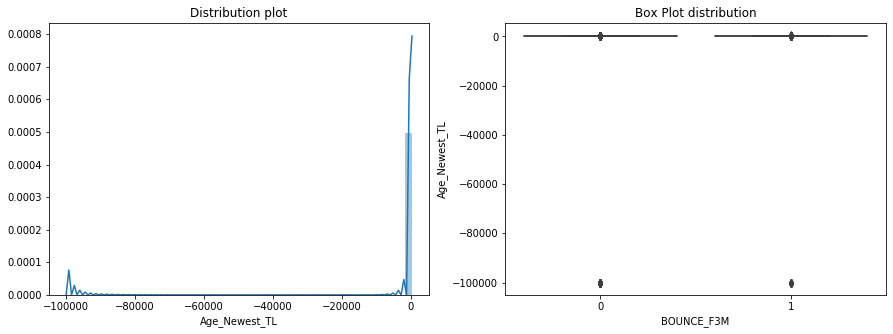

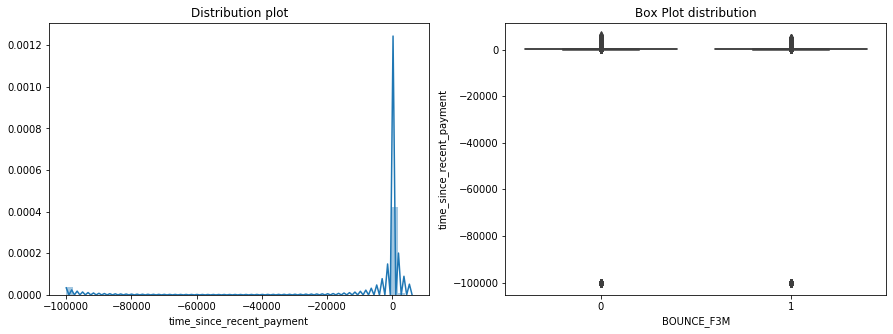

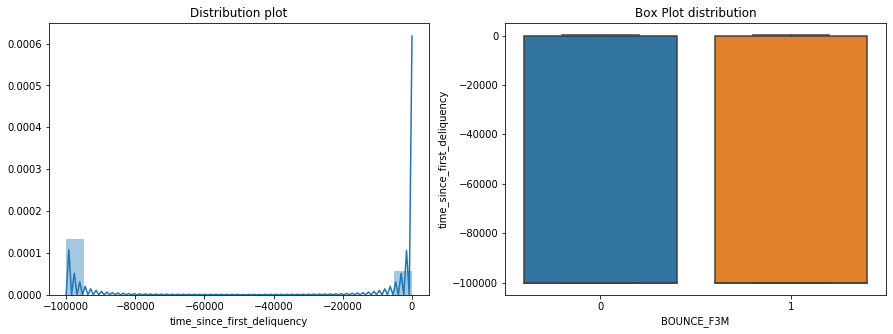

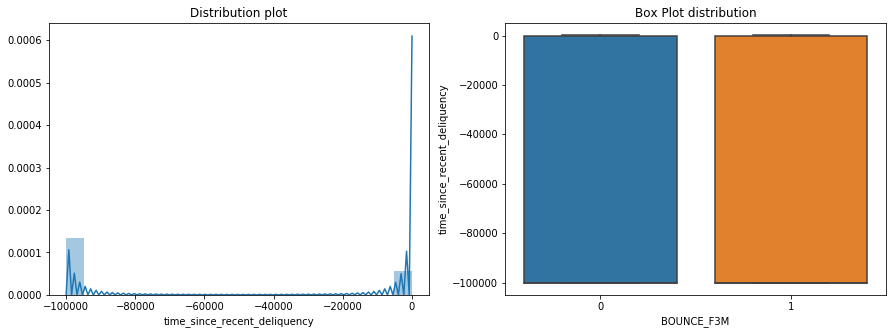

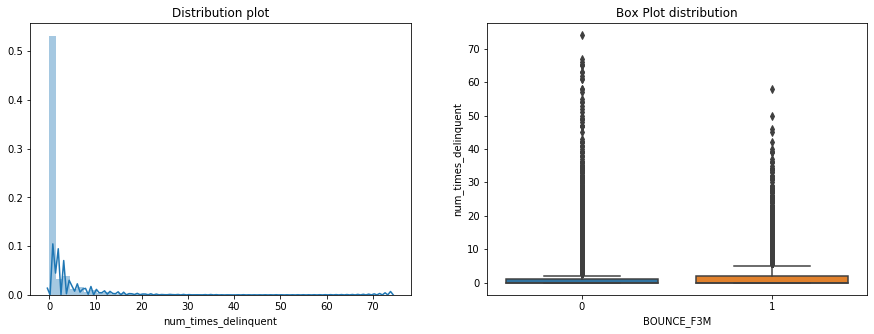

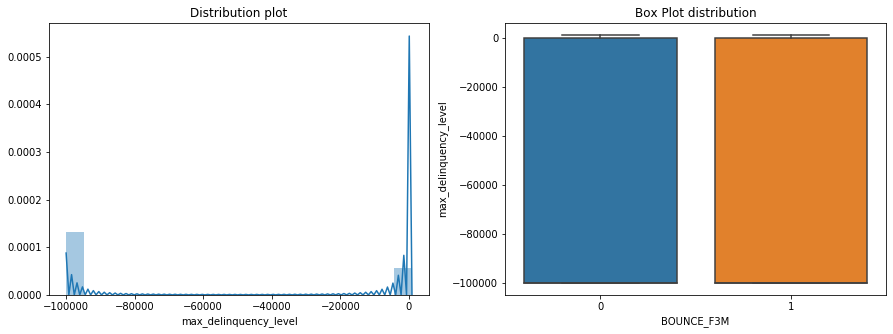

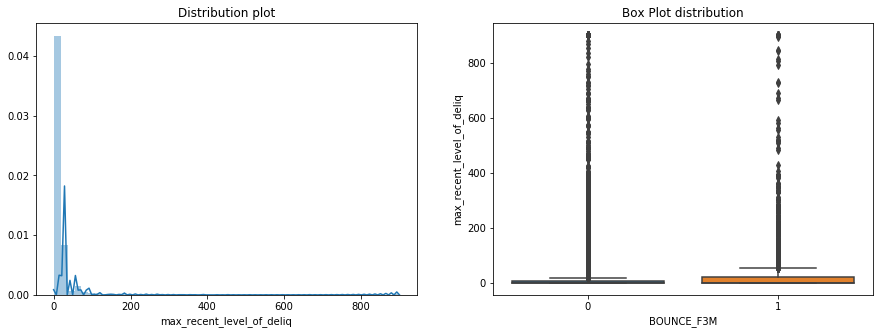

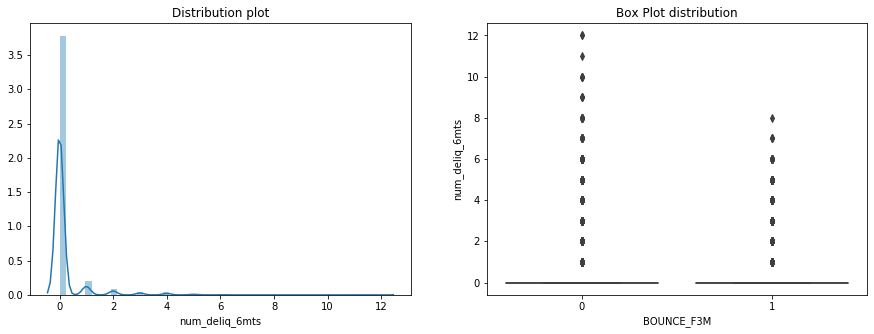

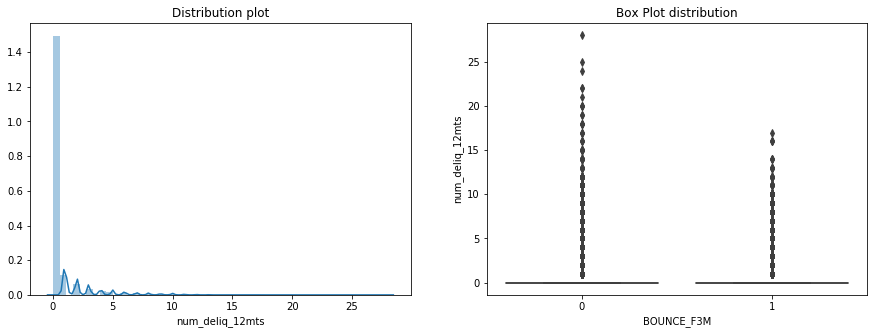

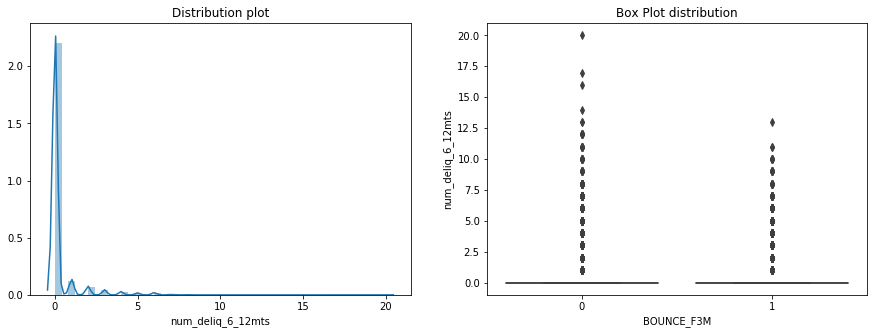

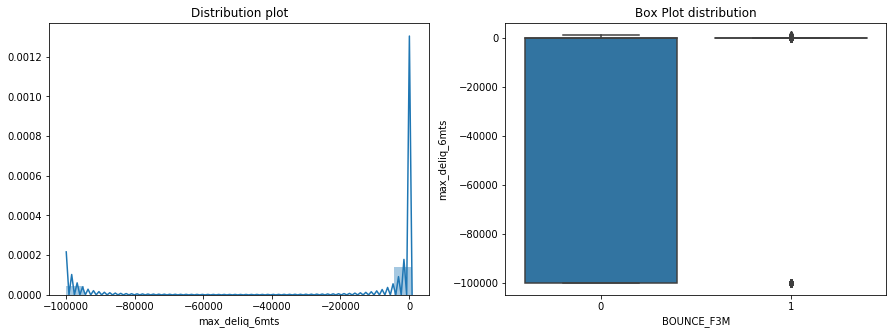

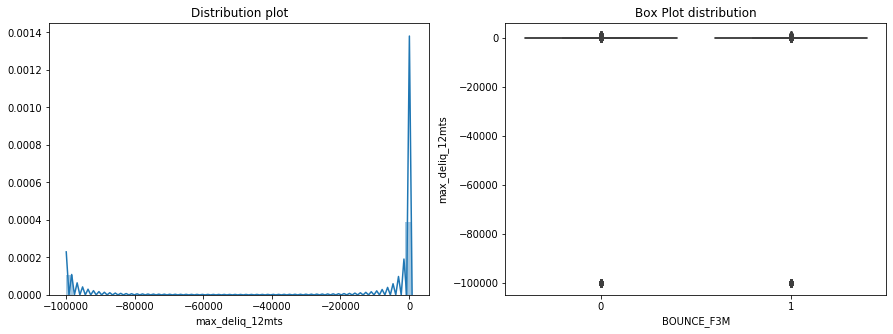

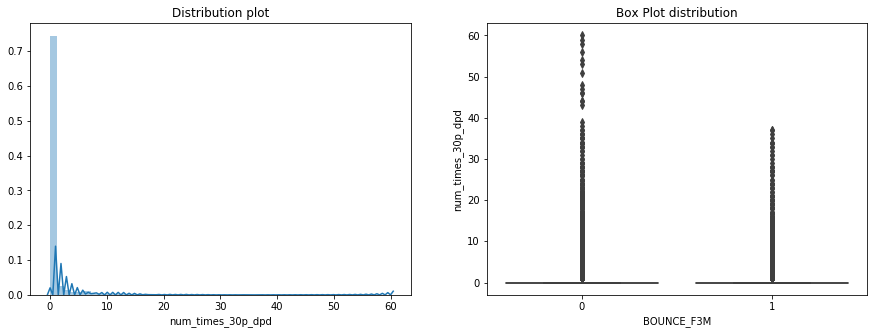

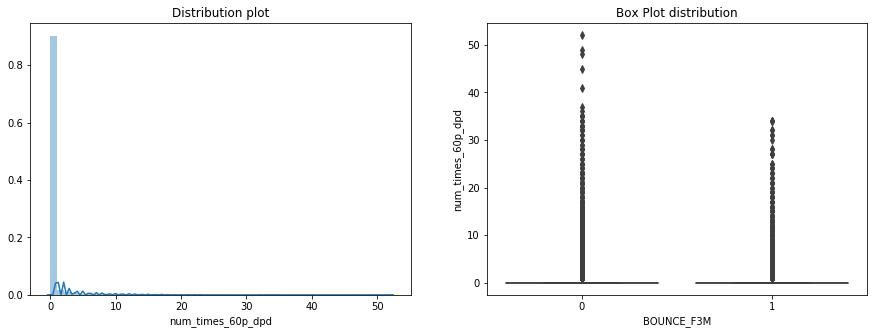

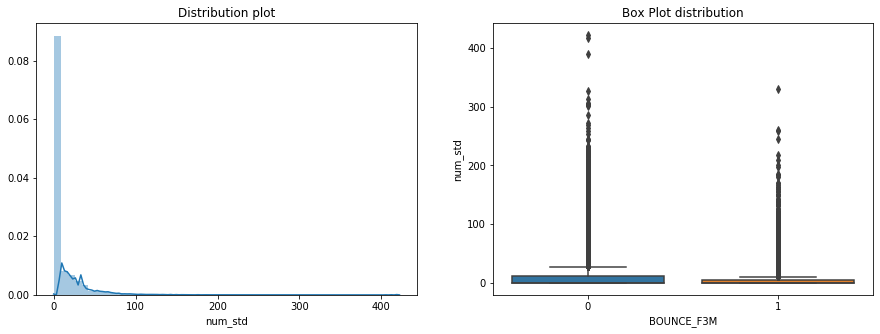

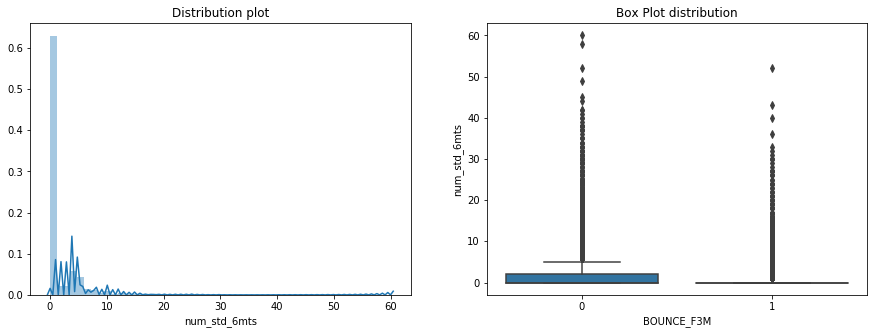

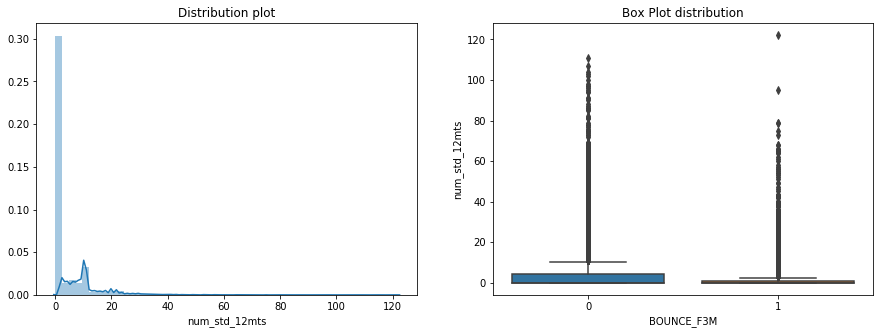

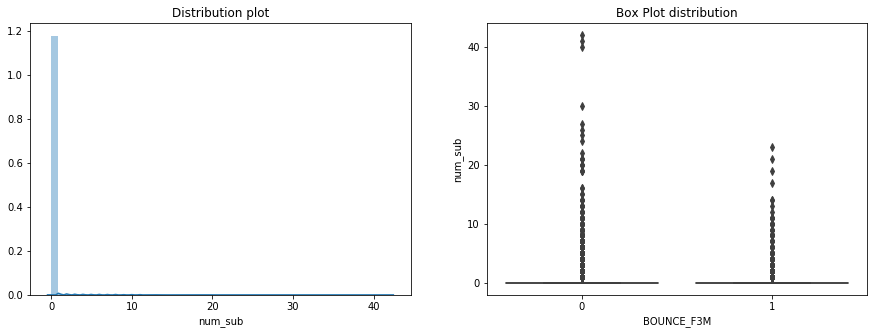

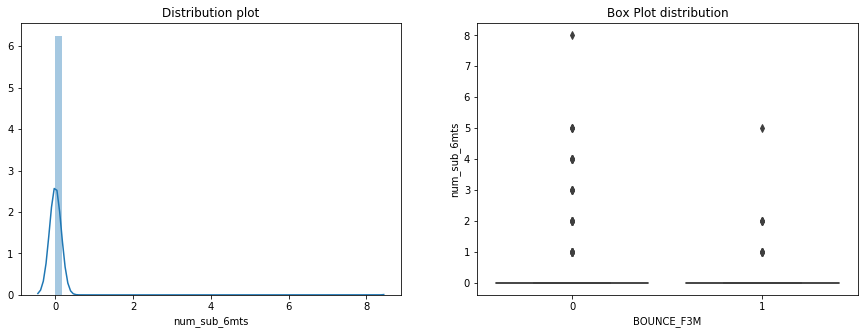

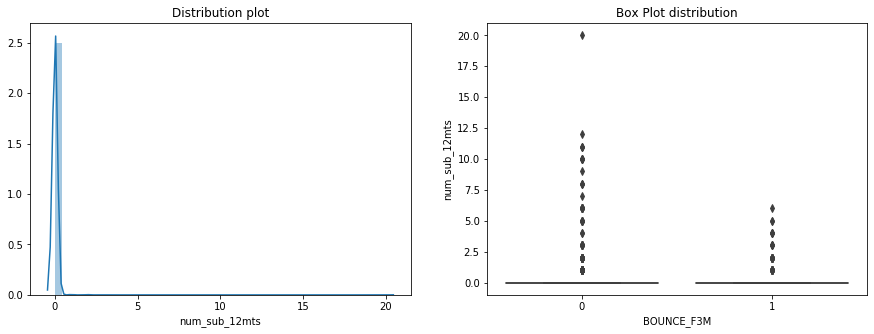

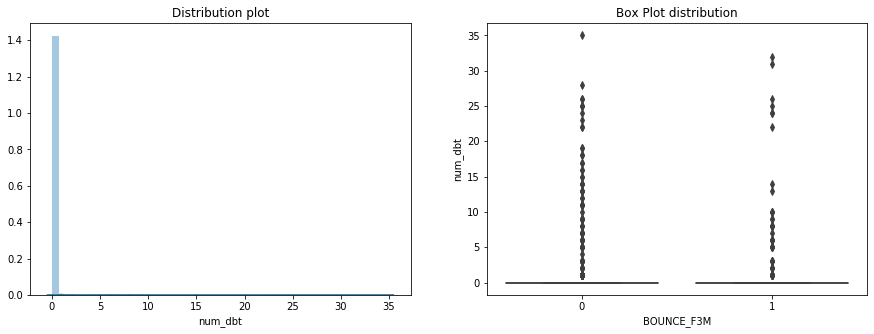

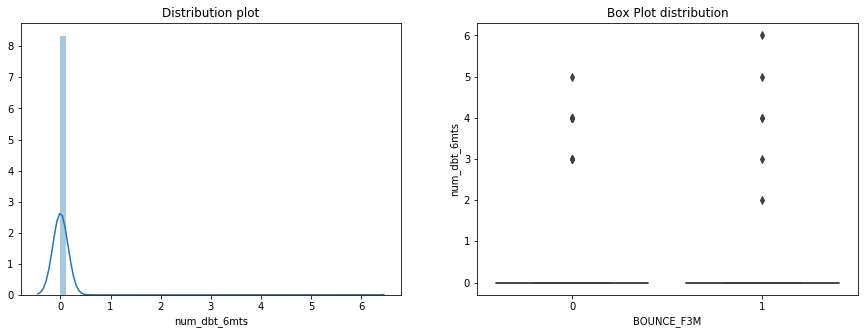

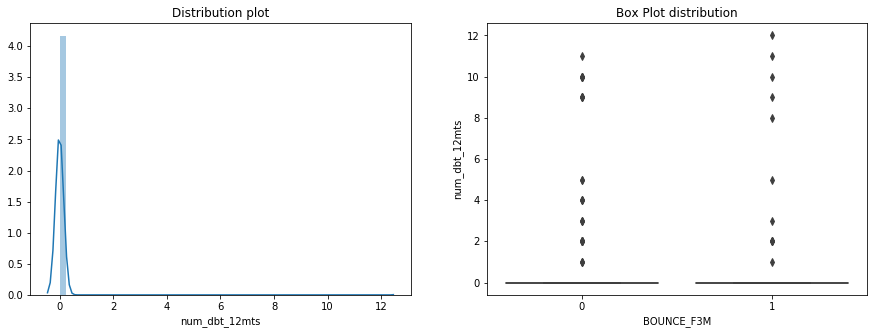

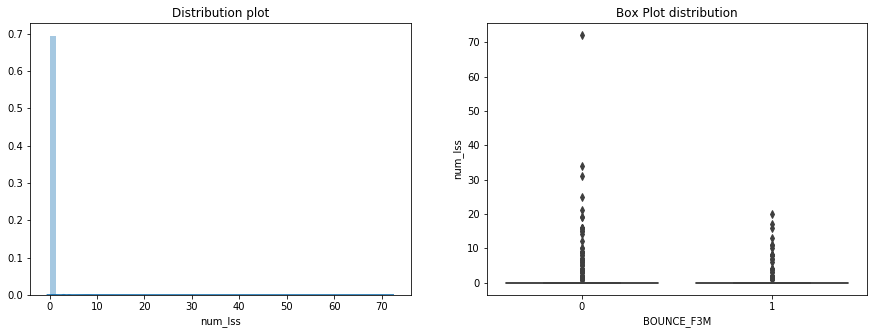

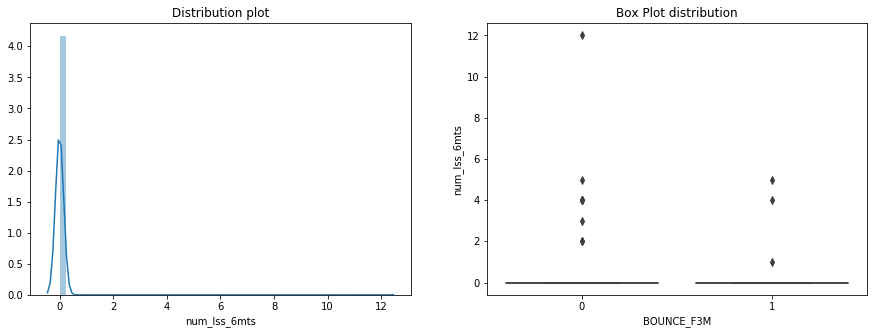

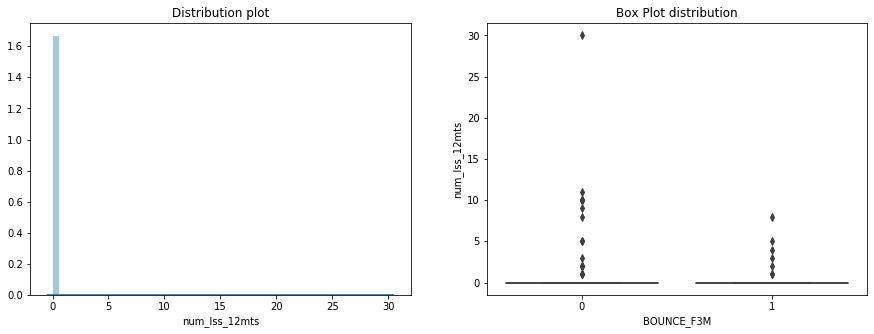

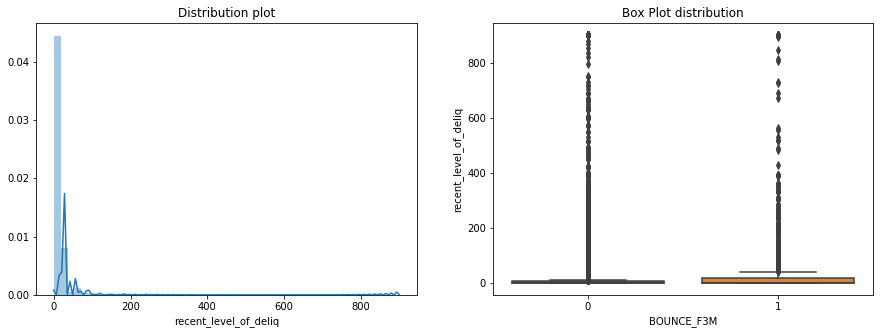

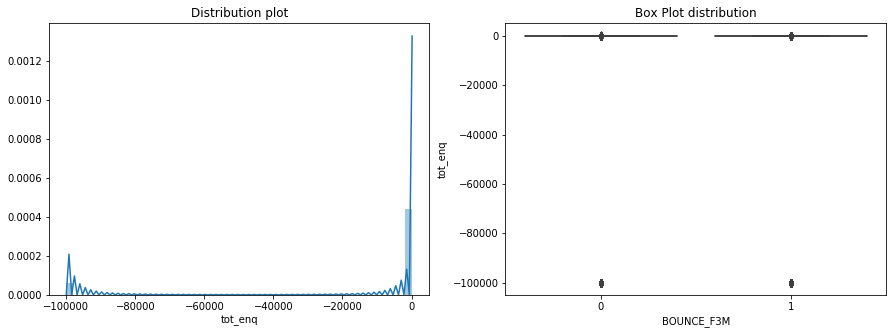

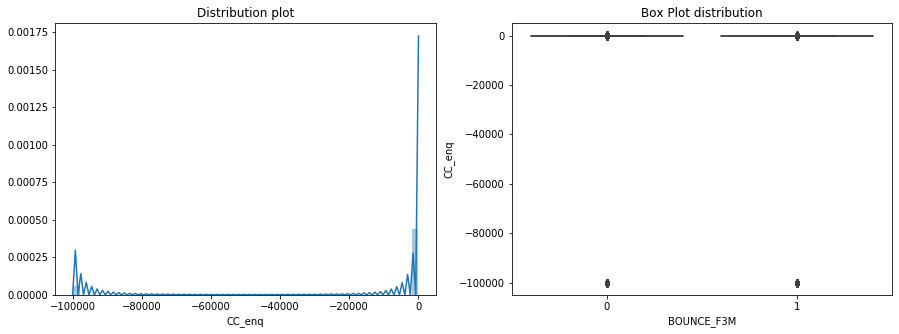

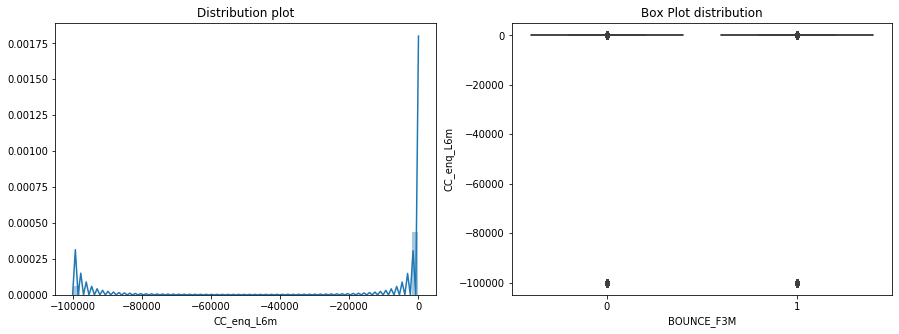

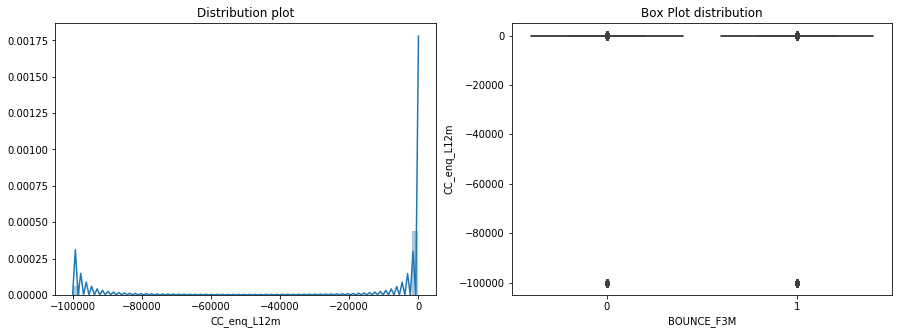

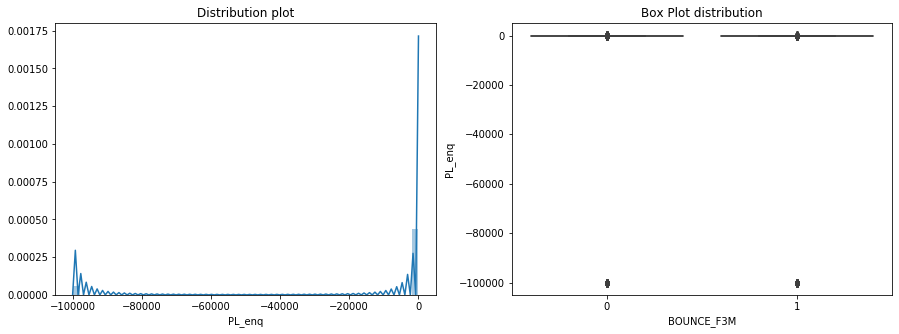

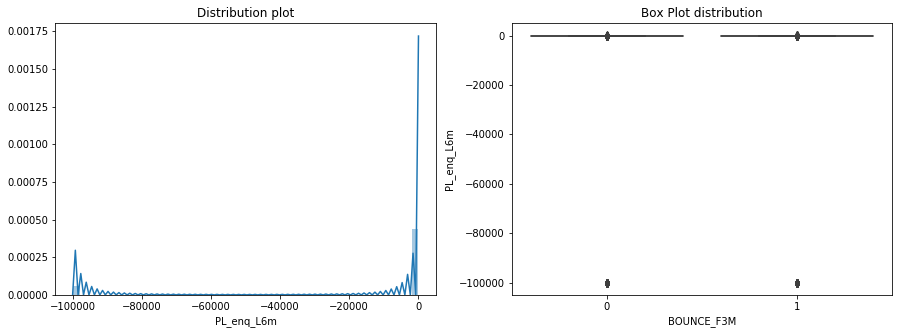

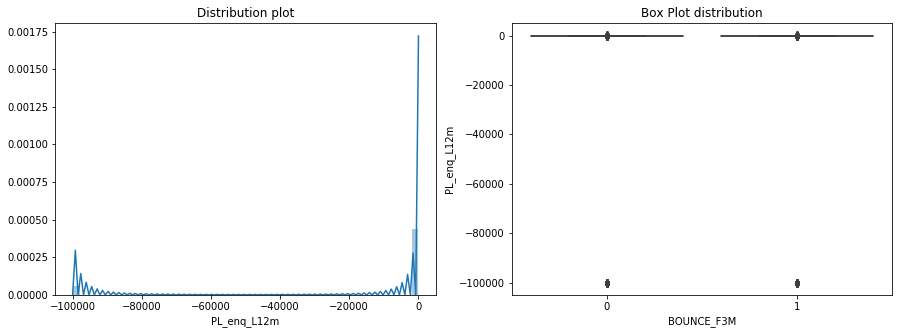

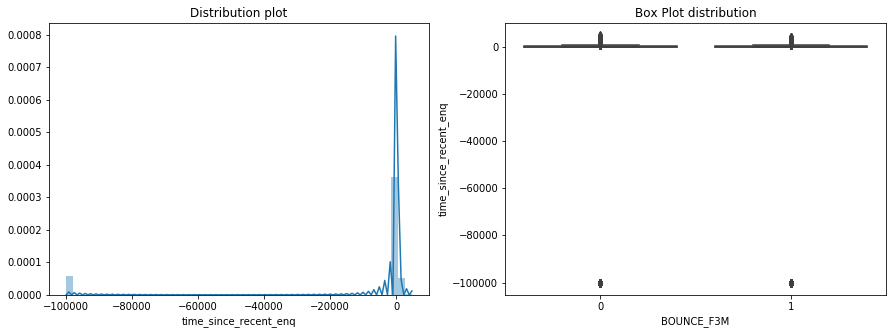

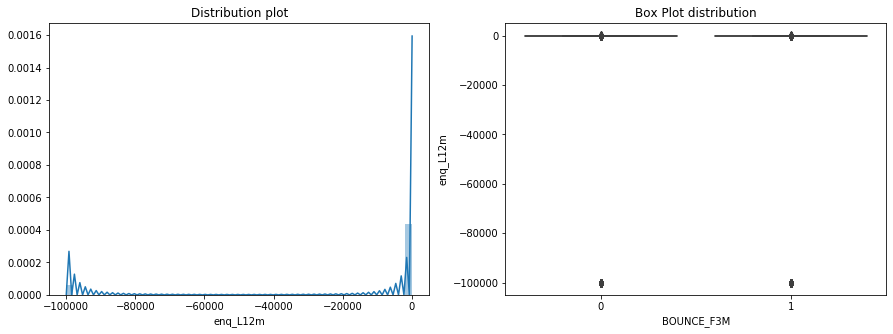

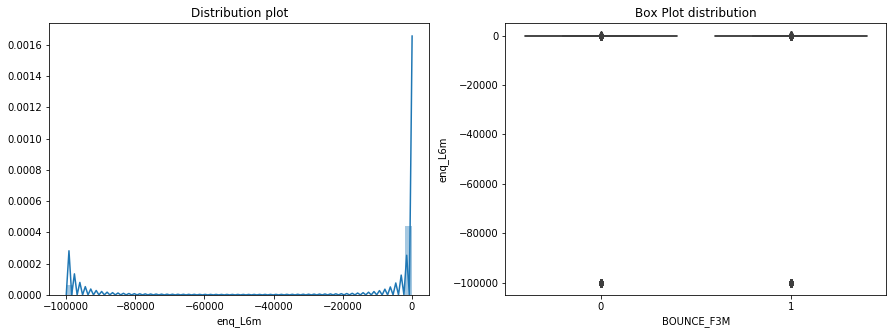

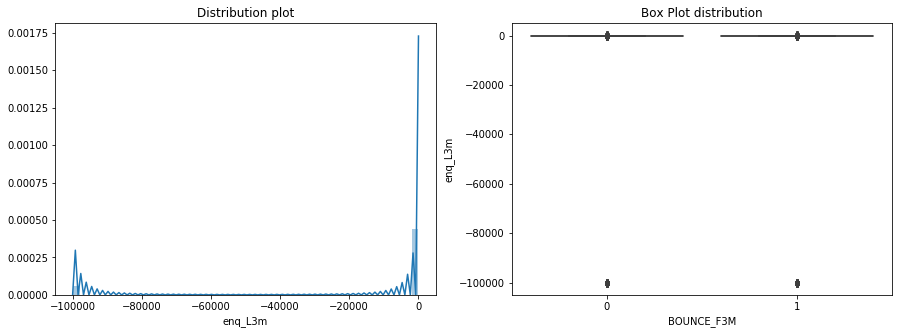

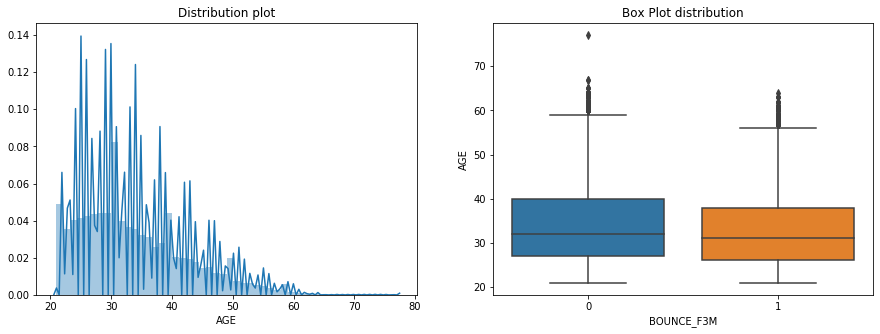

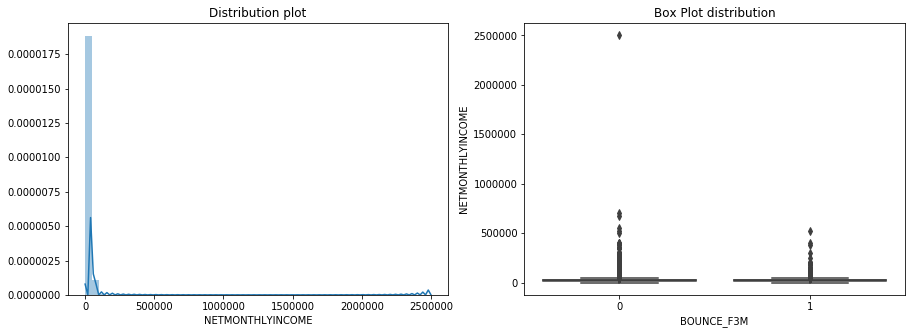

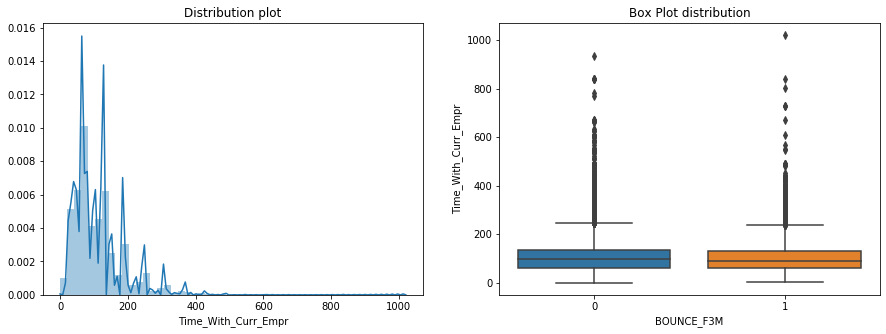

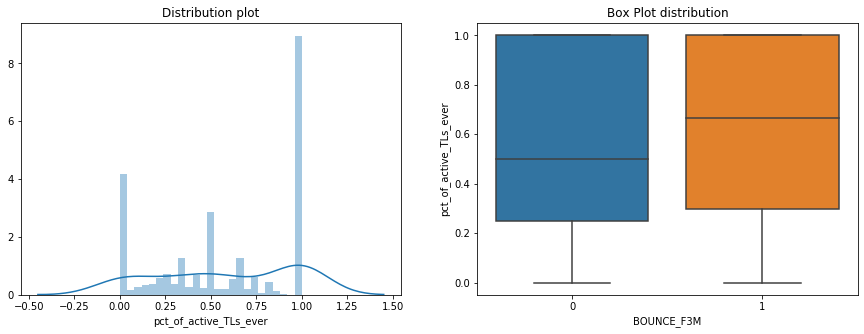

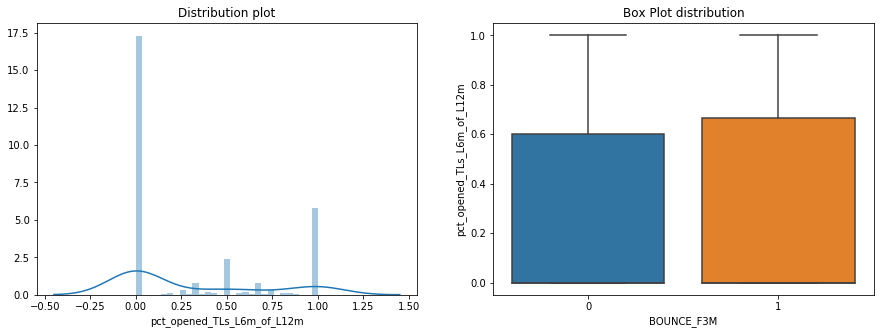

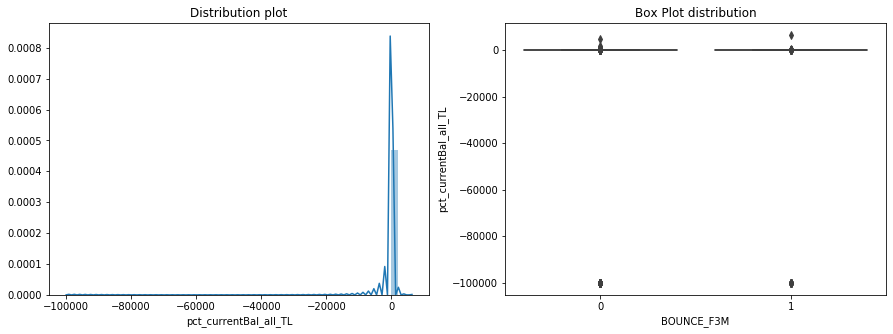

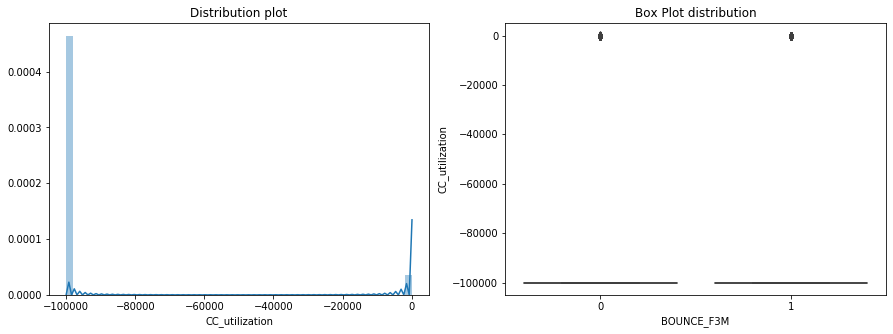

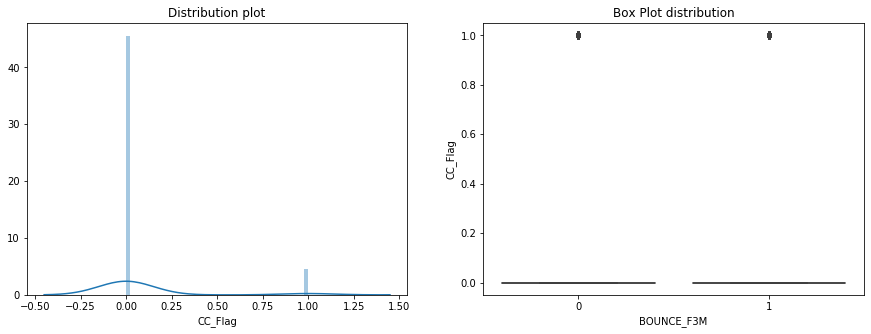

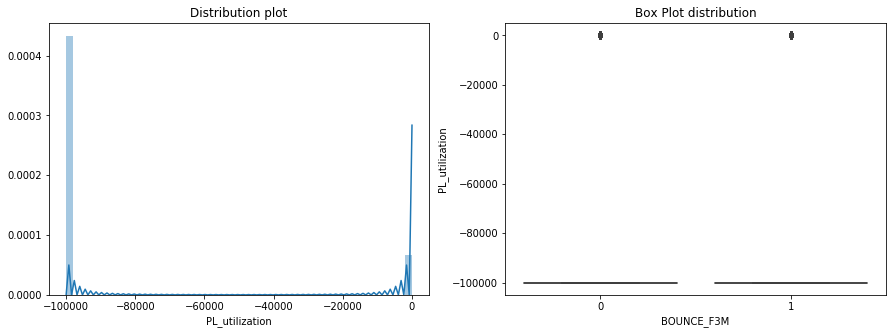

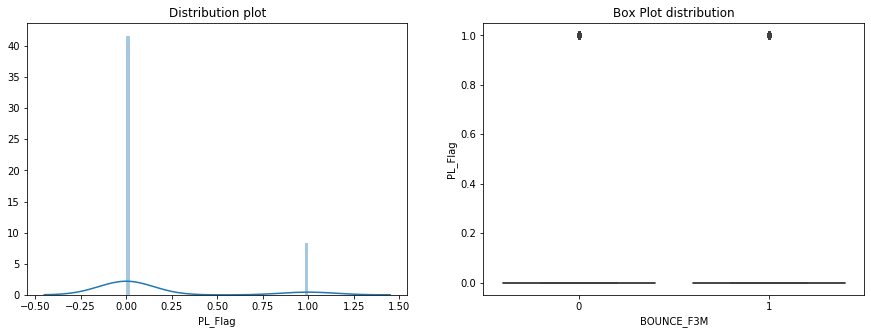

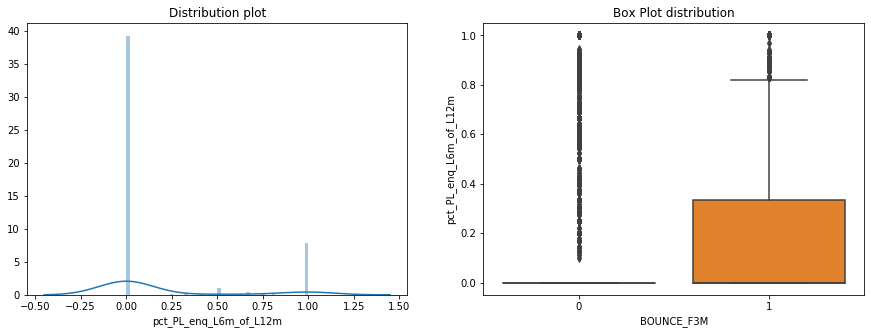

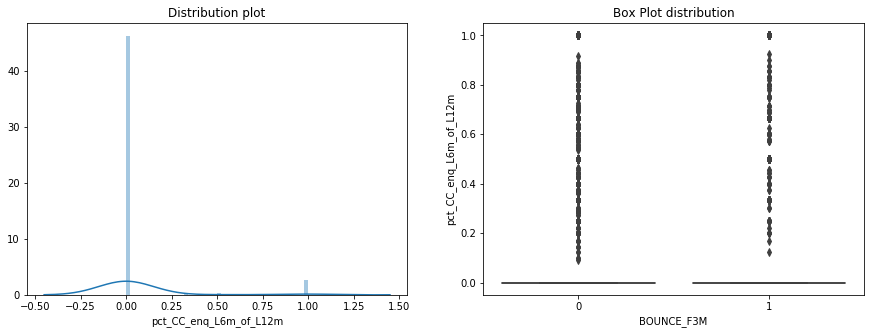

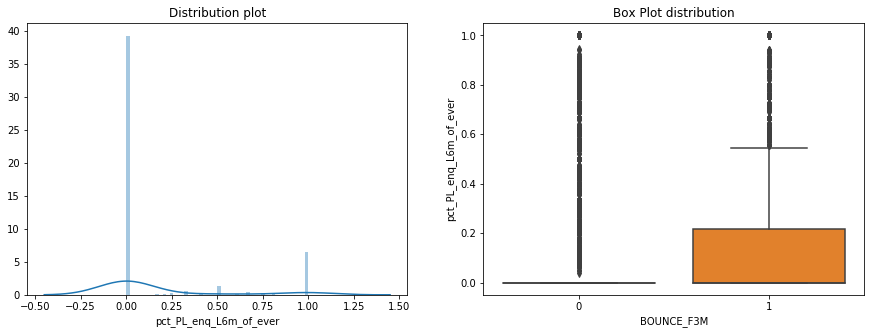

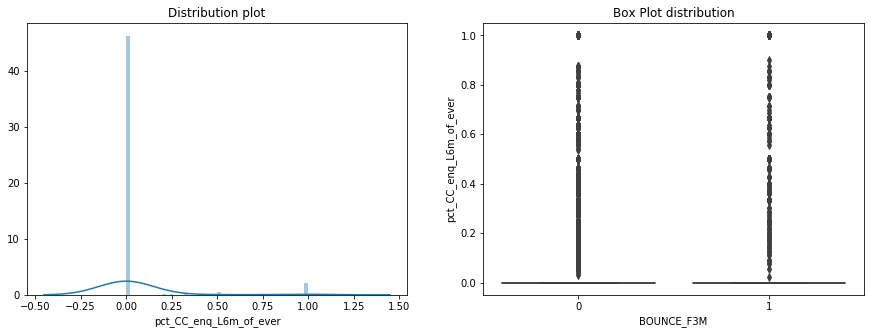

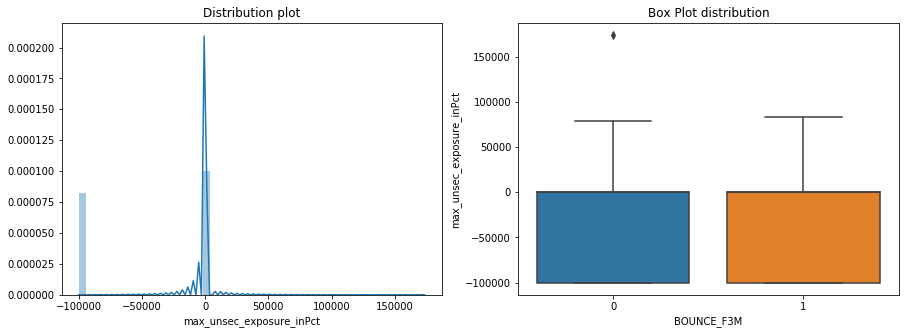

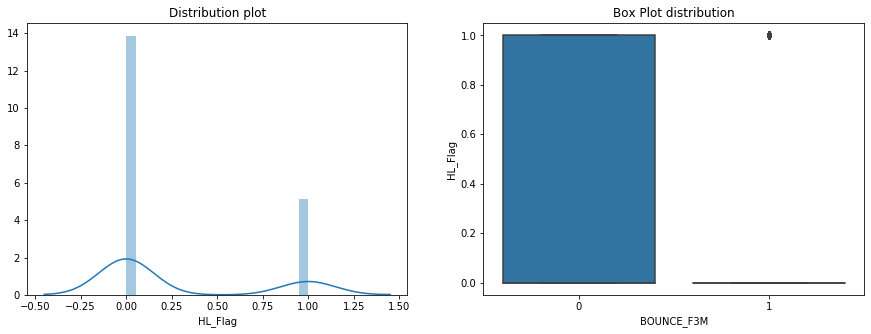

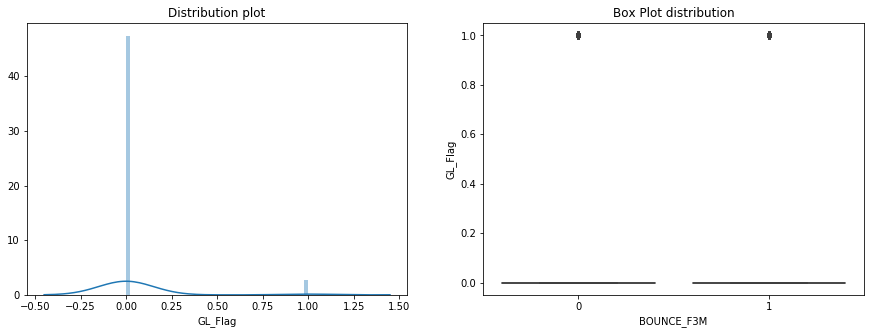

In [23]:
# distribution & boxplots for continuos variables to visually inspect distribution & outliers

for cl in num_var_list:
    cont_plots(full_data, cl, "BOUNCE_F3M")

In [24]:
cont_full_dat = full_data[num_var_list]
cont_full_dat.shape

(51336, 79)

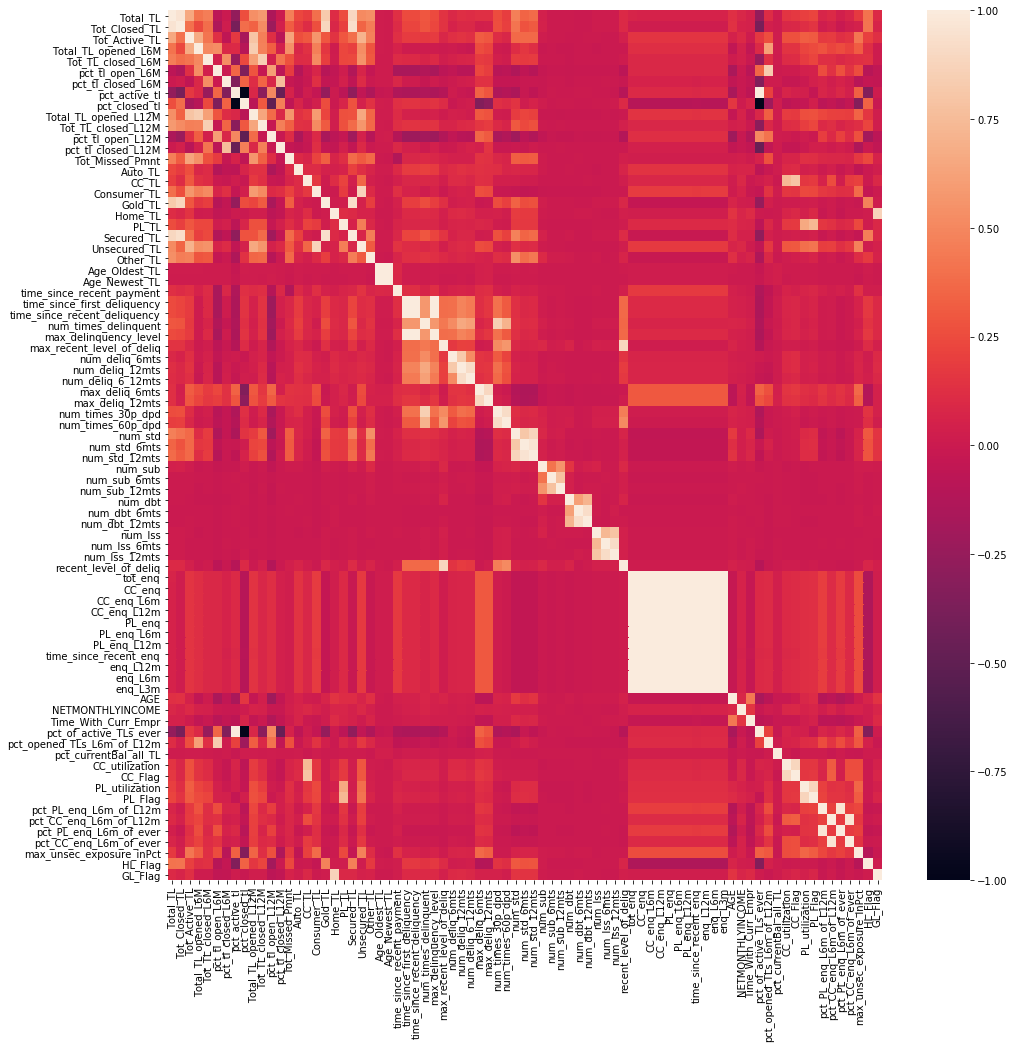

In [25]:
### Correlation heat map
f, ax = plt.subplots(figsize=(16,16))
corr = cont_full_dat.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# 3. Data treatment

### 3.1 Creating dummies for categorical variables

In [26]:
## Creating dummies for 6 categorical features

mart = pd.get_dummies(full_data['MARITALSTATUS'],prefix='MARITALSTATUS',drop_first=True)
full_data = pd.concat([full_data,mart],axis=1)

EDUCATION = pd.get_dummies(full_data['EDUCATION'],prefix='EDUCATION',drop_first=True)
full_data = pd.concat([full_data,EDUCATION],axis=1)

GENDER = pd.get_dummies(full_data['GENDER'],prefix='GENDER',drop_first=True)
full_data = pd.concat([full_data,GENDER],axis=1)

last_prod_enq2 = pd.get_dummies(full_data['last_prod_enq2'],prefix='last_prod_enq2',drop_first=True)
full_data = pd.concat([full_data,last_prod_enq2],axis=1)

first_prod_enq2 = pd.get_dummies(full_data['first_prod_enq2'],prefix='first_prod_enq2',drop_first=True)
full_data = pd.concat([full_data,first_prod_enq2],axis=1)

delinquent_flag = pd.get_dummies(full_data['delinquent_flag'],prefix='delinquent_flag',drop_first=True)
full_data = pd.concat([full_data,delinquent_flag],axis=1)

In [27]:
## Dropping the categorical variables for which dummies are created
full_data = full_data.drop(cat_var_list, 1)

In [28]:
full_data.shape

(51336, 100)

### 3.2 Special value treatment - continuous features

In [29]:
## Imputing special values to 0s
full_data_2 = full_data.copy()
for col in num_var_list:
    full_data_2[col]=np.where(full_data[col] == -99999,0,full_data[col])

In [30]:
full_data_2[num_var_list].describe().T

,count,mean,std,min,25%,50%,75%,max
Total_TL,51336.0,4.858598,7.177116,1.0,1.000,2.000,5.00000,235.000
Tot_Closed_TL,51336.0,2.770415,5.941680,0.0,0.000,1.000,3.00000,216.000
Tot_Active_TL,51336.0,2.088184,2.290774,0.0,1.000,1.000,3.00000,47.000
Total_TL_opened_L6M,51336.0,0.736754,1.296717,0.0,0.000,0.000,1.00000,27.000
Tot_TL_closed_L6M,51336.0,0.428919,0.989972,0.0,0.000,0.000,1.00000,19.000
pct_tl_open_L6M,51336.0,0.184574,0.297414,0.0,0.000,0.000,0.30800,1.000
pct_tl_closed_L6M,51336.0,0.089095,0.205635,0.0,0.000,0.000,0.05300,1.000
pct_active_tl,51336.0,0.577542,0.379867,0.0,0.250,0.556,1.00000,1.000
pct_closed_tl,51336.0,0.422458,0.379867,0.0,0.000,0.444,0.75000,1.000
Total_TL_opened_L12M,51336.0,1.503701,2.119399,0.0,0.000,1.000,2.00000,39.000


### 3.3 Outlier treatment

In [31]:
full_data_2[num_var_list].describe().T

,count,mean,std,min,25%,50%,75%,max
Total_TL,51336.0,4.858598,7.177116,1.0,1.000,2.000,5.00000,235.000
Tot_Closed_TL,51336.0,2.770415,5.941680,0.0,0.000,1.000,3.00000,216.000
Tot_Active_TL,51336.0,2.088184,2.290774,0.0,1.000,1.000,3.00000,47.000
Total_TL_opened_L6M,51336.0,0.736754,1.296717,0.0,0.000,0.000,1.00000,27.000
Tot_TL_closed_L6M,51336.0,0.428919,0.989972,0.0,0.000,0.000,1.00000,19.000
pct_tl_open_L6M,51336.0,0.184574,0.297414,0.0,0.000,0.000,0.30800,1.000
pct_tl_closed_L6M,51336.0,0.089095,0.205635,0.0,0.000,0.000,0.05300,1.000
pct_active_tl,51336.0,0.577542,0.379867,0.0,0.250,0.556,1.00000,1.000
pct_closed_tl,51336.0,0.422458,0.379867,0.0,0.000,0.444,0.75000,1.000
Total_TL_opened_L12M,51336.0,1.503701,2.119399,0.0,0.000,1.000,2.00000,39.000


In [32]:
## there are variables which have very less non-zero values .. For eg
full_data_2['num_sub_6mts'][full_data_2['num_sub_6mts'] >0].count()

51

In [33]:
full_data_3 =full_data_2.copy()
for col in num_var_list: 
    sorted(full_data_3[col])
#     q1, q3 = np.percentile(full_data_3[col], [25, 75])
#     iqr = q3 -q1

#     lower_bound = q1 -(1.5 * iqr) 
#     upper_bound = q3 +(1.5 * iqr)
    p1,p99 = np.percentile(full_data_3[col], [1, 99])
## 
    lower_bound = p1
    upper_bound = p99

    full_data_3[col] = np.where(full_data_3[col] < lower_bound, lower_bound, full_data_3[col])
    full_data_3[col] = np.where(full_data_3[col] > upper_bound, upper_bound, full_data_3[col])

In [34]:
desc_2 = full_data_3[num_var_list].describe().T
desc_2

,count,mean,std,min,25%,50%,75%,max
Total_TL,51336.0,4.685192,5.845898,1.0,1.000,2.000,5.00000,34.0000
Tot_Closed_TL,51336.0,2.617228,4.607587,0.0,0.000,1.000,3.00000,28.0000
Tot_Active_TL,51336.0,2.056140,2.106765,0.0,1.000,1.000,3.00000,11.0000
Total_TL_opened_L6M,51336.0,0.716417,1.171573,0.0,0.000,0.000,1.00000,6.0000
Tot_TL_closed_L6M,51336.0,0.413550,0.877256,0.0,0.000,0.000,1.00000,5.0000
pct_tl_open_L6M,51336.0,0.184574,0.297414,0.0,0.000,0.000,0.30800,1.0000
pct_tl_closed_L6M,51336.0,0.089095,0.205635,0.0,0.000,0.000,0.05300,1.0000
pct_active_tl,51336.0,0.577542,0.379867,0.0,0.250,0.556,1.00000,1.0000
pct_closed_tl,51336.0,0.422458,0.379867,0.0,0.000,0.444,0.75000,1.0000
Total_TL_opened_L12M,51336.0,1.467683,1.894882,0.0,0.000,1.000,2.00000,10.0000


In [35]:
# To inspect the features with low variance
low_var_features = list(desc_2[desc_2['std']==0].index)

In [36]:
# by inspection, these variables are having very low non-zero values ... 
# No need of outlier treatment as numbers are not very high
full_data_2[low_var_features].describe().T

,count,mean,std,min,25%,50%,75%,max
num_sub_6mts,51336.0,0.002435,0.091383,0.0,0.0,0.0,0.0,8.0
num_sub_12mts,51336.0,0.009292,0.233403,0.0,0.0,0.0,0.0,20.0
num_dbt,51336.0,0.025947,0.635611,0.0,0.0,0.0,0.0,35.0
num_dbt_6mts,51336.0,0.001208,0.070331,0.0,0.0,0.0,0.0,6.0
num_dbt_12mts,51336.0,0.004130,0.179885,0.0,0.0,0.0,0.0,12.0
num_lss,51336.0,0.015097,0.529730,0.0,0.0,0.0,0.0,72.0
num_lss_6mts,51336.0,0.000974,0.075413,0.0,0.0,0.0,0.0,12.0
num_lss_12mts,51336.0,0.002844,0.185349,0.0,0.0,0.0,0.0,30.0


Histogram for  num_sub_6mts


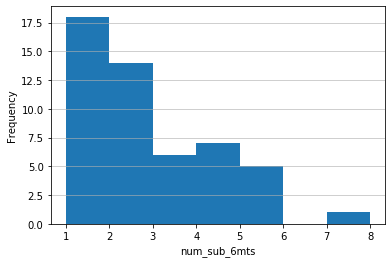

Histogram for  num_sub_12mts


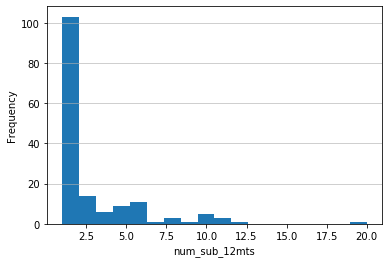

Histogram for  num_dbt


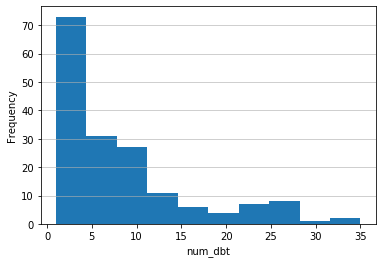

Histogram for  num_dbt_6mts


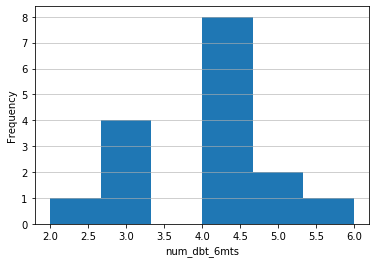

Histogram for  num_dbt_12mts


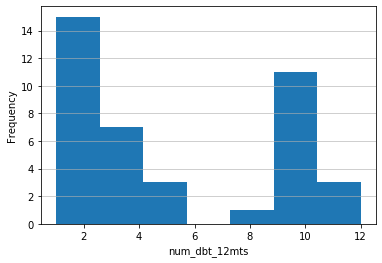

Histogram for  num_lss


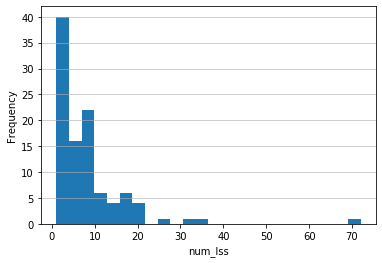

Histogram for  num_lss_6mts


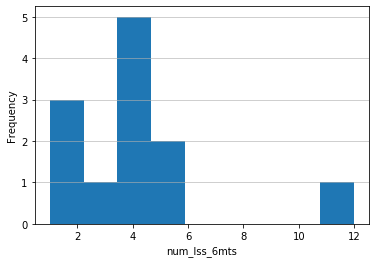

Histogram for  num_lss_12mts


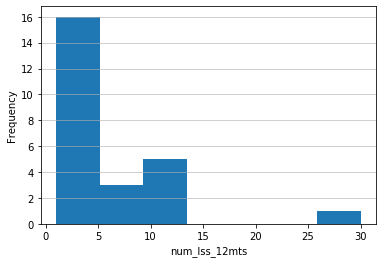

In [37]:
### Histogram plots for selective low non-zero value features on non-zero datapoints

col = 'num_dbt'
for col in low_var_features:
    print("Histogram for ", col)
    n, bins, patches = plt.hist(x=full_data_2.loc[full_data_2[col] >0,col], bins='auto')
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [38]:
## Adding low variance features without treatment
full_data_3 =  full_data_3.drop(low_var_features,1)
full_data_3 =  pd.concat([full_data_3, full_data_2[low_var_features]], axis =1 )

### 3.4 Feature scaling 

In [39]:
feature_list = list(full_data_3.columns)
# .remove(["30_DPD_F3M","BOUNCE_F3M"])
feature_list.remove("BOUNCE_F3M")
feature_list.remove("30_DPD_F3M")


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
full_data_scaled = pd.DataFrame(scaler.fit_transform(full_data_3[feature_list]), index=full_data_3.index, columns=feature_list)

In [41]:
full_data_final = pd.concat([full_data_scaled, full_data_3[['BOUNCE_F3M','30_DPD_F3M']]],axis=1)

In [42]:
# t = full_data_scaled.head()
# t.to_csv(r"C:\Users\siddh\Desktop\Syneptic Assignment\test_scaled.csv")

# 4. Modelling - Bounce Rate

In [43]:
x_feats = feature_list
y_feats = ['BOUNCE_F3M']

#### Test Train Split 

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,  y_test = train_test_split(full_data_final[x_feats],full_data_final[y_feats],test_size = 0.3, random_state=42 )

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(35935, 98)
(35935, 1)
(15401, 98)
(15401, 1)


### Functions for ROC Curve & KS Table

In [46]:
def roc_curve(fpr,tpr):
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

In [47]:
def ks_table(y_true,y_pred,n_groups=10,KS_table=False):
    ro_df = pd.DataFrame({'Actual':y_true,'Predicted':y_pred}).sort_values('Predicted',ascending=True)
    ro_df = ro_df.reset_index()
    ro_df['index'] = ro_df.index
    ro_df['groups'] = np.ceil(((ro_df['index']+1) *n_groups/ro_df.shape[0]).values).astype(np.int8)
    smry = ro_df.groupby('groups').agg({'index': 'count','Predicted':[ np.min, np.max,np.mean],'Actual':np.sum})
    smry.columns = smry.columns.droplevel(0)
    smry = smry.reset_index()
    smry = smry.rename(columns={'sum':'Actual'})
    smry['Actual'] = smry['Actual'].astype(np.int32)
    smry['Non-Events'] = (smry['count'] - smry['Actual']).astype(np.int32)
    smry = smry.rename(columns={'groups':'Tier','count':'Observations','mean':'Mean-Prob','amin':'Min-Prob','amax':'Max-Prob','Actual':'Events'})
    smry['Cum-Events(%)'] = np.round((smry['Events'].cumsum()/ smry['Events'].sum())*100,2)
    smry['Cum-Non-Events(%)'] = np.round((smry['Non-Events'].cumsum()/ smry['Non-Events'].sum())*100,2)
    smry['Events-Rate(%)'] = smry['Events']*100/smry['Observations']
    smry['KS-Score'] = np.round((smry['Cum-Non-Events(%)'] - smry['Cum-Events(%)']),2)
    print("KS=Score is " + str(max(smry['KS-Score'])))
    if KS_table:
        return smry[['Tier', 'Observations', 'Min-Prob', 'Mean-Prob', 'Max-Prob',
               'Events', 'Non-Events','Events-Rate(%)', 'Cum-Events(%)',
               'Cum-Non-Events(%)', 'KS-Score']]

### 4.1 Logistic regression model

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import statsmodels.api as sm 

clf_LG_1 = LogisticRegression()
clf_LG_1.fit(x_train,y_train)

pred_train_LG_1 = clf_LG_1.predict(x_train)
pred_test_LG_1 = clf_LG_1.predict(x_test)
pred_prob_train_LG_1 = clf_LG_1.predict_proba(x_train)[:1]
pred_prob_test_LG_1 = clf_LG_1.predict_proba(x_test)[:1]

accuracy_train_LG_1 = accuracy_score(pred_train_LG_1,y_train)
accuracy_test_LG_1 = accuracy_score(pred_test_LG_1,y_test)
fpr_train_LG_1, tpr_train_LG_1, _ = metrics.roc_curve(np.array(y_train), clf_LG_1.predict_proba(x_train)[:,1])
auc_train_LG_1 = metrics.auc(fpr_train_LG_1,tpr_train_LG_1)

fpr_test_LG_1, tpr_test_LG_1, _ = metrics.roc_curve(np.array(y_test), clf_LG_1.predict_proba(x_test)[:,1])
auc_test_LG_1 = metrics.auc(fpr_test_LG_1,tpr_test_LG_1)


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [49]:
print("Train accuracy {}".format(accuracy_train_LG_1))
print("Test accuracy is {}".format(accuracy_test_LG_1))

print('Train AUC is {}'.format(auc_train_LG_1))
print('Test AUC is {}'.format(auc_test_LG_1))

Train accuracy 0.7596771949352998
Test accuracy is 0.7556652165443802
Train AUC is 0.6336080087717848
Test AUC is 0.6242341183648611


#### Confusion matrix

In [50]:
confusion_LG_1_train = metrics.confusion_matrix( y_train, pred_train_LG_1 )
confusion_LG_1_train

array([[27102,   154],
       [ 8482,   197]], dtype=int64)

In [51]:
confusion_LG_1_test = metrics.confusion_matrix( y_test, pred_test_LG_1 )
confusion_LG_1_test

array([[11566,    67],
       [ 3696,    72]], dtype=int64)

#### Validation metrics

ROC Curve for Train data


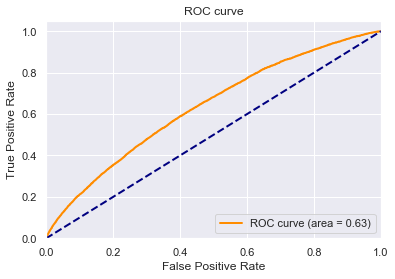

In [55]:
print("ROC Curve for Train sample")
roc_curve(fpr_train_LG_1,tpr_train_LG_1)

In [65]:
y_hat_train_proba = clf_LG_1.predict_proba(x_train)[: ][: , 1]
loan_data_targets_train_temp = y_train.copy()
loan_data_targets_train_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs = pd.concat([loan_data_targets_train_temp, pd.DataFrame(y_hat_train_proba)], axis = 1)
df_actual_predicted_probs.columns = ['targets', 'prob']
df_actual_predicted_probs.index = y_train.index

In [66]:
print("Train KS ")
ks_table(df_actual_predicted_probs['targets'],df_actual_predicted_probs['prob'],10,True)

Train KS 
KS=Score is 18.6


,Tier,Observations,Min-Prob,Mean-Prob,Max-Prob,Events,Non-Events,Events-Rate(%),Cum-Events(%),Cum-Non-Events(%),KS-Score
0,1,3593,0.009436,0.101723,0.138475,397,3196,11.049262,4.57,11.73,7.16
1,2,3594,0.138485,0.158438,0.174373,531,3063,14.774624,10.69,22.96,12.27
2,3,3593,0.174375,0.186305,0.197275,590,3003,16.420818,17.49,33.98,16.49
3,4,3594,0.197287,0.206701,0.215888,789,2805,21.953255,26.58,44.27,17.69
4,5,3593,0.215901,0.224507,0.233367,808,2785,22.488171,35.89,54.49,18.60
5,6,3594,0.233372,0.242733,0.252367,891,2703,24.791319,46.16,64.41,18.25
6,7,3593,0.252374,0.262806,0.274331,956,2637,26.607292,57.17,74.08,16.91
7,8,3594,0.274332,0.288162,0.304210,1033,2561,28.742348,69.07,83.48,14.41
8,9,3593,0.304211,0.327185,0.353206,1179,2414,32.813805,82.66,92.34,9.68
9,10,3594,0.353238,0.416534,0.790178,1505,2089,41.875348,100.00,100.00,0.00


ROC Curve for Test sample


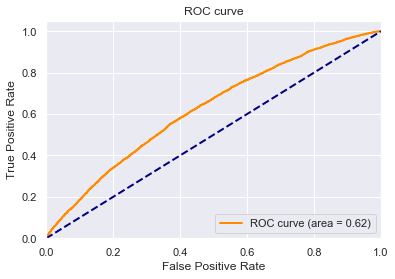

In [56]:
print("ROC Curve for Test sample")
roc_curve(fpr_test_LG_1,tpr_test_LG_1)

In [67]:
y_hat_test_proba = clf_LG_1.predict_proba(x_test)[: ][: , 1]
loan_data_targets_test_temp = y_test.copy()
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs.columns = ['targets', 'prob']
df_actual_predicted_probs.index = y_test.index

In [68]:
print("Test KS ")
ks_table(df_actual_predicted_probs['targets'],df_actual_predicted_probs['prob'],10,True)

Test KS 
KS=Score is 17.95


,Tier,Observations,Min-Prob,Mean-Prob,Max-Prob,Events,Non-Events,Events-Rate(%),Cum-Events(%),Cum-Non-Events(%),KS-Score
0,1,1540,0.003272,0.102060,0.138358,176,1364,11.428571,4.67,11.73,7.06
1,2,1540,0.138406,0.158451,0.173925,240,1300,15.584416,11.04,22.90,11.86
2,3,1540,0.173930,0.186098,0.197213,292,1248,18.961039,18.79,33.63,14.84
3,4,1540,0.197260,0.206777,0.216059,303,1237,19.675325,26.83,44.26,17.43
4,5,1540,0.216062,0.225220,0.234417,362,1178,23.506494,36.44,54.39,17.95
5,6,1540,0.234419,0.243677,0.253382,392,1148,25.454545,46.84,64.26,17.42
6,7,1540,0.253399,0.264337,0.276023,436,1104,28.311688,58.41,73.75,15.34
7,8,1540,0.276031,0.290539,0.307305,446,1094,28.961039,70.25,83.15,12.90
8,9,1540,0.307367,0.328518,0.354898,538,1002,34.935065,84.53,91.76,7.23
9,10,1541,0.354899,0.418098,0.720165,583,958,37.832576,100.00,100.00,0.00


## 4.2 XG Boost 

In [142]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV   
import gc # for deleting unused variables
%matplotlib inline

In [58]:
model_xgb_1 = XGBClassifier()
model_xgb_1.fit(x_train, y_train)

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [59]:
y_pred_test_prob_xgb_1= model_xgb_1.predict_proba(x_test)
y_pred_test_xgb_1 = model_xgb_1.predict(x_test)

y_pred_train_prob_xgb_1= model_xgb_1.predict_proba(x_train)
y_pred_train_xgb_1 = model_xgb_1.predict(x_train)

accuracy_test_xgb_1 = accuracy_score(y_pred_test_xgb_1,y_test)
accuracy_test_xgb_1
accuracy_train_xgb_1 = accuracy_score(y_pred_train_xgb_1,y_train)
accuracy_train_xgb_1

fpr_train_xgb_1, tpr_train_xgb_1, _ = metrics.roc_curve(np.array(y_train), model_xgb_1.predict_proba(x_train)[:,1])
auc_train_xgb_1 = metrics.auc(fpr_train_xgb_1,tpr_train_xgb_1)
fpr_test_xgb_1, tpr_test_xgb_1, _ = metrics.roc_curve(np.array(y_test), model_xgb_1.predict_proba(x_test)[:,1])
auc_test_xgb_1 = metrics.auc(fpr_test_xgb_1,tpr_test_xgb_1)




In [60]:
print("Train accuracy {}".format(accuracy_train_xgb_1))
print("Test accuracy is {}".format(accuracy_test_xgb_1))

print('Train AUC is {}'.format(auc_train_xgb_1))
print('Test AUC is {}'.format(auc_test_xgb_1))

Train accuracy 0.8335049394740504
Test accuracy is 0.7449516265177586
Train AUC is 0.8961407504418513
Test AUC is 0.6060577584852229


### Feature importance

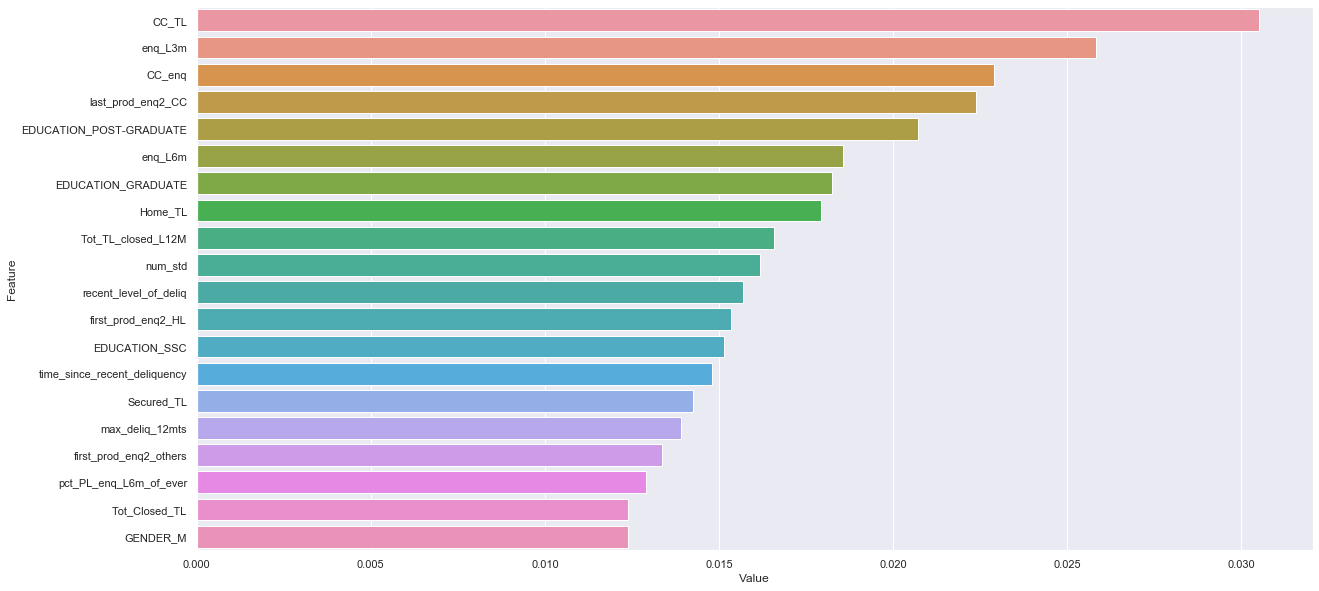

In [69]:
fig, ax = plt.subplots(figsize=(20, 10))
feature_imp = pd.DataFrame(sorted(zip(model_xgb_1.feature_importances_,x_train.columns)), columns=['Value','Feature'])
feature_imp = feature_imp.sort_values('Value',ascending=False).reset_index(drop=True)
feature_imp_smpl = feature_imp.iloc[:20,:]
ax = sns.barplot(x="Value", y="Feature", data=feature_imp_smpl)

### Model Validation Metrics

ROC Curve for Train sample


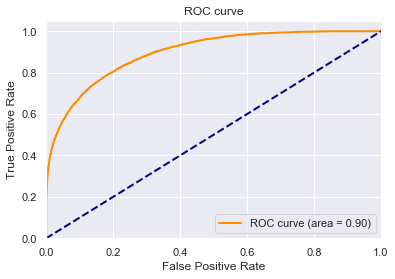

In [70]:
print("ROC Curve for Train sample")
roc_curve(fpr_train_xgb_1,tpr_train_xgb_1)

In [71]:
y_hat_train_proba = model_xgb_1.predict_proba(x_train)[: ][: , 1]
loan_data_targets_train_temp = y_train.copy()
loan_data_targets_train_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs = pd.concat([loan_data_targets_train_temp, pd.DataFrame(y_hat_train_proba)], axis = 1)
df_actual_predicted_probs.columns = ['targets', 'prob']
df_actual_predicted_probs.index = y_train.index

In [72]:
print("Train KS ")
ks_table(df_actual_predicted_probs['targets'],df_actual_predicted_probs['prob'],10,True)

Train KS 
KS=Score is 60.37


,Tier,Observations,Min-Prob,Mean-Prob,Max-Prob,Events,Non-Events,Events-Rate(%),Cum-Events(%),Cum-Non-Events(%),KS-Score
0,1,3593,0.001220,0.044006,0.071620,2,3591,0.055664,0.02,13.18,13.16
1,2,3594,0.071666,0.091921,0.111400,39,3555,1.085142,0.47,26.22,25.75
2,3,3593,0.111405,0.128930,0.145563,80,3513,2.226552,1.39,39.11,37.72
3,4,3594,0.145604,0.161426,0.177279,206,3388,5.731775,3.77,51.54,47.77
4,5,3593,0.177283,0.193262,0.209057,376,3217,10.464793,8.10,63.34,55.24
5,6,3594,0.209059,0.225370,0.241784,585,3009,16.277129,14.84,74.38,59.54
6,7,3593,0.241790,0.260339,0.280414,813,2780,22.627331,24.21,84.58,60.37
7,8,3594,0.280419,0.305844,0.336954,1242,2352,34.557596,38.52,93.21,54.69
8,9,3593,0.337000,0.388978,0.462128,2012,1581,55.997773,61.70,99.01,37.31
9,10,3594,0.462211,0.615544,0.978475,3324,270,92.487479,100.00,100.00,0.00


ROC Curve for Test sample


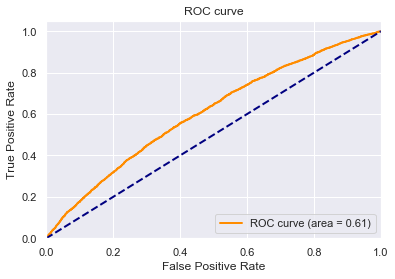

In [74]:
print("ROC Curve for Test sample")
roc_curve(fpr_test_xgb_1,tpr_test_xgb_1)

In [75]:
y_hat_test_proba = model_xgb_1.predict_proba(x_test)[: ][: , 1]
loan_data_targets_test_temp = y_test.copy()
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs.columns = ['targets', 'prob']
df_actual_predicted_probs.index = y_test.index

In [76]:
print("Test KS ")
ks_table(df_actual_predicted_probs['targets'],df_actual_predicted_probs['prob'],10,True)

Test KS 
KS=Score is 14.99


,Tier,Observations,Min-Prob,Mean-Prob,Max-Prob,Events,Non-Events,Events-Rate(%),Cum-Events(%),Cum-Non-Events(%),KS-Score
0,1,1540,0.001563,0.052629,0.084110,204,1336,13.246753,5.41,11.48,6.07
1,2,1540,0.084115,0.104490,0.123817,285,1255,18.506494,12.98,22.27,9.29
2,3,1540,0.123825,0.141140,0.158464,278,1262,18.051948,20.36,33.12,12.76
3,4,1540,0.158465,0.173671,0.188654,321,1219,20.844156,28.87,43.60,14.73
4,5,1540,0.188686,0.202555,0.216799,384,1156,24.935065,39.07,53.54,14.47
5,6,1540,0.216825,0.231118,0.244940,362,1178,23.506494,48.67,63.66,14.99
6,7,1540,0.244979,0.262252,0.280437,417,1123,27.077922,59.74,73.32,13.58
7,8,1540,0.280486,0.301912,0.327058,452,1088,29.350649,71.74,82.67,10.93
8,9,1540,0.327081,0.363310,0.410077,496,1044,32.207792,84.90,91.64,6.74
9,10,1541,0.410449,0.519244,0.949094,569,972,36.924075,100.00,100.00,0.00


### Grid search for XG Boost

In [80]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.01, 0.04, 0.08, 0.1,0.15], 
#              'subsample': [0.3, 0.6],
             'n_estimators': [300,500],
                'max_depth' : [5],
             'min_samples_split' : [32,64],
             'min_samples_leaf' : [10,20],
             'max_features' : ['auto', 'sqrt']}


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                       refit='AUC')      



In [81]:
model_cv.fit(x_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0

#### Best model params based on grid search 

In [140]:
best_params = {'learning_rate': 0.04, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 32, 'n_estimators': 300}

In [136]:
# print(model_cv.best_params_)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\siddh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-136-2a46a61c737b>", line 1, in <module>
    print(model_cv.best_params_)
NameError: name 'model_cv' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\siddh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\siddh\anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\siddh\anaconda3\lib\site-package

NameError: name 'model_cv' is not defined

#### Fitting the XGB with best params

In [144]:
xgb_model_2 = XGBClassifier(**model_cv.best_params_)
# xgb_model_2 = XGBClassifier(learning_rate= 0.04, max_depth= 5, max_features ='auto', min_samples_leaf= 10, min_samples_split= 32, n_estimators= 300)
xgb_model_2.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.04, max_delta_step=0, max_depth=5,
              max_features='auto', min_child_weight=1, min_samples_leaf=10,
              min_samples_split=32, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [145]:
# train preds
y_pred_prob_train_xgb2= xgb_model_2.predict_proba(x_train)
y_pred_train_xgb2 = xgb_model_2.predict(x_train)

In [146]:
# tst preds
y_pred_prob_xgb2= xgb_model_2.predict_proba(x_test)
y_pred_xgb2 = xgb_model_2.predict(x_test)

In [147]:
roc_train_xgb_2 = metrics.roc_auc_score(y_train, y_pred_prob_train_xgb2[:, 1])
print("Train AUC for XGB with grid search : %.2f%%" % (roc_train_xgb_2 * 100.0))
roc_test_xgb_2 = metrics.roc_auc_score(y_test, y_pred_prob_xgb2[:, 1])
print("Test AUC for XGB with grid search : %.2f%%" % (roc_test_xgb_2 * 100.0))
accuracy_train_xgb_2 = accuracy_score(y_pred_train_xgb2,y_train)
print("Train accuracy for XGB with grid search : %.2f%%"% (accuracy_train_xgb_2*100.0))
accuracy_test_xgb_2 = accuracy_score(y_pred_xgb2,y_test)
print("Test accuracy for XGB with grid search : %.2f%%" % (accuracy_test_xgb_2*100.0))

Train AUC for XGB with grid search : 76.03%
Test AUC for XGB with grid search : 63.79%
Train accuracy for XGB with grid search : 77.31%
Test accuracy for XGB with grid search : 75.38%


#### feature importance, KS and ROC curve

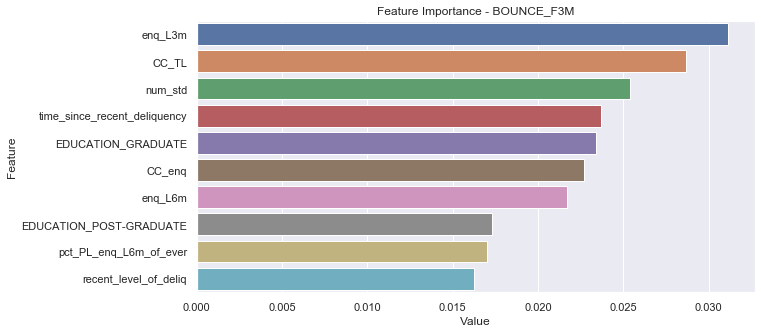

In [156]:
fig, ax = plt.subplots(figsize=(10, 5))
feature_imp_xgb_2 = pd.DataFrame(sorted(zip(xgb_model_2.feature_importances_,x_train.columns)), columns=['Value','Feature'])
feature_imp_xgb_2 = feature_imp_xgb_2.sort_values('Value',ascending=False).reset_index(drop=True)
feature_imp_smpl = feature_imp_xgb_2.iloc[:10,:]
ax = sns.barplot(x="Value", y="Feature", data=feature_imp_smpl).set(title = "Feature Importance - BOUNCE_F3M" )

In [107]:
fpr_train_xgb_2, tpr_train_xgb_2, _ = metrics.roc_curve(np.array(y_train), xgb_model_2.predict_proba(x_train)[:,1])
fpr_test_xgb_2, tpr_test_xgb_2, _ = metrics.roc_curve(np.array(y_test), xgb_model_2.predict_proba(x_test)[:,1])

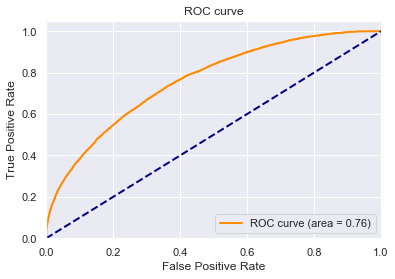

In [141]:
#Train ROC
roc_curve(fpr_train_xgb_2,tpr_train_xgb_2)

In [281]:
y_hat_train_proba = xgb_model_2.predict_proba(x_train)[: ][: , 1]
loan_data_targets_train_temp = y_train.copy()
loan_data_targets_train_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs = pd.concat([loan_data_targets_train_temp, pd.DataFrame(y_hat_train_proba)], axis = 1)
df_actual_predicted_probs.columns = ['targets', 'prob']
df_actual_predicted_probs.index = y_train.index

In [282]:
print("Train KS ")
ks_table(df_actual_predicted_probs['targets'],df_actual_predicted_probs['prob'],10,True)

Train KS 
KS=Score is 36.88


,Tier,Observations,Min-Prob,Mean-Prob,Max-Prob,Events,Non-Events,Events-Rate(%),Cum-Events(%),Cum-Non-Events(%),KS-Score
0,1,3593,0.010497,0.094987,0.128023,77,3516,2.143056,0.89,12.90,12.01
1,2,3594,0.128030,0.146553,0.162650,248,3346,6.900390,3.74,25.18,21.44
2,3,3593,0.162652,0.175935,0.188762,416,3177,11.578068,8.54,36.83,28.29
3,4,3594,0.188768,0.199679,0.210295,535,3059,14.885921,14.70,48.06,33.36
4,5,3593,0.210297,0.220766,0.230836,649,2944,18.062900,22.18,58.86,36.68
5,6,3594,0.230840,0.240859,0.250936,855,2739,23.789649,32.03,68.91,36.88
6,7,3593,0.250937,0.262105,0.274623,977,2616,27.191762,43.29,78.50,35.21
7,8,3594,0.274624,0.290160,0.308699,1177,2417,32.749026,56.85,87.37,30.52
8,9,3593,0.308722,0.335729,0.369390,1434,2159,39.910938,73.37,95.29,21.92
9,10,3594,0.369429,0.448075,0.875884,2311,1283,64.301614,100.00,100.00,0.00


In [283]:
y_hat_test_proba = xgb_model_2.predict_proba(x_test)[: ][: , 1]
loan_data_targets_test_temp = y_test.copy()
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs.columns = ['targets', 'prob']
df_actual_predicted_probs.index = y_test.index

In [284]:
print("Test KS ")
ks_table(df_actual_predicted_probs['targets'],df_actual_predicted_probs['prob'],10,True)

Test KS 
KS=Score is 20.34


,Tier,Observations,Min-Prob,Mean-Prob,Max-Prob,Events,Non-Events,Events-Rate(%),Cum-Events(%),Cum-Non-Events(%),KS-Score
0,1,1540,0.020506,0.099036,0.131431,171,1369,11.103896,4.54,11.77,7.23
1,2,1540,0.131498,0.149397,0.165173,229,1311,14.870130,10.62,23.04,12.42
2,3,1540,0.165200,0.178559,0.191240,261,1279,16.948052,17.54,34.03,16.49
3,4,1540,0.191241,0.202168,0.212757,300,1240,19.480519,25.50,44.69,19.19
4,5,1540,0.212761,0.222279,0.231740,344,1196,22.337662,34.63,54.97,20.34
5,6,1540,0.231741,0.241856,0.252142,397,1143,25.779221,45.17,64.80,19.63
6,7,1540,0.252151,0.263004,0.275089,431,1109,27.987013,56.61,74.33,17.72
7,8,1540,0.275092,0.290434,0.307730,455,1085,29.545455,68.68,83.66,14.98
8,9,1540,0.307767,0.333124,0.364693,561,979,36.428571,83.57,92.07,8.50
9,10,1541,0.364716,0.433831,0.824901,619,922,40.168722,100.00,100.00,0.00


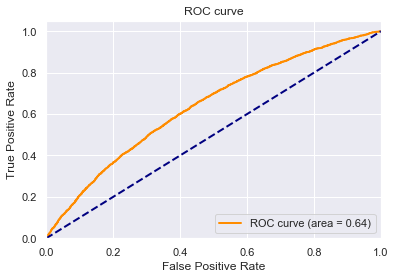

In [142]:
# Test ROC 
roc_curve(fpr_test_xgb_2,tpr_test_xgb_2)

# 5. Modelling 30_DPD

### 5.1.1 Logistic Regression without Balancing 

In [116]:
y_feats_2 = ['30_DPD_F3M']

In [117]:
from sklearn.model_selection import train_test_split
x_train_2, x_test_2,y_train_2,  y_test_2 = train_test_split(full_data_final[x_feats],full_data_final[y_feats_2],test_size = 0.3, random_state=42 )

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
    

model_LG_2 = LogisticRegression()
model_LG_2.fit(x_train_2,y_train_2)

pred_train_LG_2 = model_LG_2.predict(x_train_2)
pred_test_LG_2 = model_LG_2.predict(x_test_2)
pred_prob_train_LG_2 = model_LG_2.predict_proba(x_train_2)[:,1]
pred_prob_test_LG_2 = model_LG_2.predict_proba(x_test_2)[:,1]

accuracy_train_LG_2 = accuracy_score(pred_train_LG_2,y_train_2)
accuracy_test_LG_2 = accuracy_score(pred_test_LG_2,y_test_2)
fpr_train_LG_2, tpr_train_LG_2, _ = metrics.roc_curve(np.array(y_train_2), model_LG_2.predict_proba(x_train_2)[:,1])
auc_train_LG_2 = metrics.auc(fpr_train_LG_2,tpr_train_LG_2)

fpr_test_LG_2, tpr_test_LG_2, _ = metrics.roc_curve(np.array(y_test_2), model_LG_2.predict_proba(x_test_2)[:,1])
auc_test_LG_2 = metrics.auc(fpr_test_LG_2,tpr_test_LG_2)



C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [121]:
print("Event Rate is %.2f%%"% ((np.sum(y_train_2)/x_train_2.shape[0])*100))

print("Train Accuracy is : %.2f%%"% (accuracy_train_LG_2*100))
print("Test Accuracy is : %.2f%%"% (accuracy_test_LG_2*100))

print("Train AUC is : %.2f%%"% (auc_train_LG_2*100))
print("Test AUC is : %.2f%%"% (auc_test_LG_2*100))


Event Rate is 3.52%
Train Accuracy is : 96.48%
Test Accuracy is : 96.62%
Train AUC is : 72.02%
Test AUC is : 69.31%


### Feature IMportance Logistic Regression

In [122]:
coefs = np.abs(model_LG_2.coef_[0])
indices = np.argsort(coefs)[::-1]


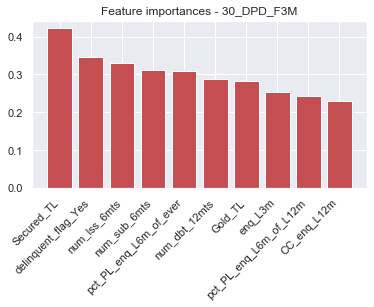

In [154]:
plt.figure()
plt.title("Feature importances - 30_DPD_F3M")
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center")
plt.xticks(range(10), np.array(x_train.columns)[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

### Validation 

In [82]:
y_hat_test_proba = model_LG_2.predict_proba(x_test_2)[: ][: , 1]
loan_data_targets_test_temp = y_test_2.copy()
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs_test = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs_test.columns = ['targets', 'prob']
df_actual_predicted_probs_test.index = y_test_2.index


In [89]:
print("Test ")
ks_table(df_actual_predicted_probs_test['targets'],df_actual_predicted_probs_test['prob'],10,True)


Test 
KS=Score is 29.19


,Tier,Observations,Min-Prob,Mean-Prob,Max-Prob,Events,Non-Events,Events-Rate(%),Cum-Events(%),Cum-Non-Events(%),KS-Score
0,1,1540,1.736151e-13,0.006490,0.010210,13,1527,0.844156,2.50,10.26,7.76
1,2,1540,1.021191e-02,0.012813,0.015179,26,1514,1.688312,7.51,20.43,12.92
2,3,1540,1.518028e-02,0.017177,0.019070,23,1517,1.493506,11.95,30.63,18.68
3,4,1540,1.907102e-02,0.020886,0.022706,26,1514,1.688312,16.96,40.80,23.84
4,5,1540,2.271123e-02,0.024631,0.026669,37,1503,2.402597,24.08,50.90,26.82
5,6,1540,2.667380e-02,0.029012,0.031522,40,1500,2.597403,31.79,60.98,29.19
6,7,1540,3.152576e-02,0.034587,0.037893,61,1479,3.961039,43.55,70.92,27.37
7,8,1540,3.789324e-02,0.042355,0.047517,66,1474,4.285714,56.26,80.82,24.56
8,9,1540,4.754006e-02,0.055567,0.066694,87,1453,5.649351,73.03,90.59,17.56
9,10,1541,6.676884e-02,0.112701,0.982458,140,1401,9.085010,100.00,100.00,0.00


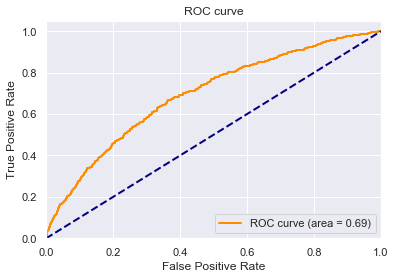

In [134]:
roc_curve(fpr_test_LG_2,tpr_test_LG_2)

### Logistic Regression With OverSampling

In [85]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
    

In [359]:

testauc = []
trainauc = []
aucdiff = []
sfactor = []
# testing for upsampling rates of 4% to 40% for train sample
# aucdiff.append
for sf in np.arange(0.04,0.4,0.01):
    ros = RandomOverSampler(sampling_strategy=sf,random_state=42)
    x_ros,y_ros = ros.fit_sample(x_train_2,y_train_2)
#     np.sum(y_ros)/x_ros.shape[0]

    model_LG_i = LogisticRegression()
    model_LG_i.fit(x_ros,y_ros)

    pred_train_LG_i = model_LG_i.predict(x_ros)
    pred_test_LG_i = model_LG_i.predict(x_test)
    pred_prob_train_LG_i = model_LG_i.predict_proba(x_ros)[:,1]
    pred_prob_test_LG_i = model_LG_i.predict_proba(x_test_2)[:,1]

    accuracy_train_LG_i = accuracy_score(pred_train_LG_i,y_ros)
    accuracy_test_LG_i = accuracy_score(pred_test_LG_i,y_test_2)
    fpr_train_LG_i, tpr_train_LG_i, _ = metrics.roc_curve(np.array(y_ros), model_LG_i.predict_proba(x_ros)[:,1])
    auc_train_LG_i = metrics.auc(fpr_train_LG_i,tpr_train_LG_i)

    fpr_test_LG_i, tpr_test_LG_i, _ = metrics.roc_curve(np.array(y_test_2), model_LG_i.predict_proba(x_test_2)[:,1])
    auc_test_LG_i = metrics.auc(fpr_test_LG_i,tpr_test_LG_i)
    
    auc_diff = (auc_train_LG_i-auc_test_LG_i)
   
    sfactor.append(sf)
    testauc.append(auc_test_LG_i)
    trainauc.append(auc_train_LG_i)
    aucdiff.append(auc_diff)
    
       
    
    print("For sampling factor ", sf)
    print("Train Event Rate is %.2f%%"% ((np.sum(y_ros)/x_ros.shape[0])*100))
    print("Test Event Rate is %.2f%%"% ((np.sum(y_test_2)/x_test_2.shape[0])*100))

    print("Train Accuracy is : %.2f%%"% (accuracy_train_LG_i*100))
    print("Test Accuracy is : %.2f%%"% (accuracy_test_LG_i*100))

    print("Train AUC is : %.2f%%"% (auc_train_LG_i*100))
    print("Test AUC is : %.2f%%"% (auc_test_LG_i*100))


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

For sampling factor  0.04
Train Event Rate is 3.84%
Test Event Rate is 3.37%
Train Accuracy is : 96.15%
Test Accuracy is : 96.59%
Train AUC is : 72.12%
Test AUC is : 69.16%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.05
Train Event Rate is 4.76%
Test Event Rate is 3.37%
Train Accuracy is : 95.22%
Test Accuracy is : 96.57%
Train AUC is : 71.88%
Test AUC is : 68.92%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.060000000000000005
Train Event Rate is 5.66%
Test Event Rate is 3.37%
Train Accuracy is : 94.31%
Test Accuracy is : 96.55%
Train AUC is : 71.97%
Test AUC is : 69.04%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.07
Train Event Rate is 6.54%
Test Event Rate is 3.37%
Train Accuracy is : 93.44%
Test Accuracy is : 96.54%
Train AUC is : 72.45%
Test AUC is : 68.93%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.08000000000000002
Train Event Rate is 7.41%
Test Event Rate is 3.37%
Train Accuracy is : 92.55%
Test Accuracy is : 96.49%
Train AUC is : 72.46%
Test AUC is : 68.75%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.09000000000000001
Train Event Rate is 8.26%
Test Event Rate is 3.37%
Train Accuracy is : 91.68%
Test Accuracy is : 96.46%
Train AUC is : 72.37%
Test AUC is : 68.78%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.1
Train Event Rate is 9.09%
Test Event Rate is 3.37%
Train Accuracy is : 90.89%
Test Accuracy is : 96.44%
Train AUC is : 72.60%
Test AUC is : 68.72%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.11000000000000001
Train Event Rate is 9.91%
Test Event Rate is 3.37%
Train Accuracy is : 90.10%
Test Accuracy is : 96.36%
Train AUC is : 72.62%
Test AUC is : 68.89%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.12000000000000002
Train Event Rate is 10.71%
Test Event Rate is 3.37%
Train Accuracy is : 89.36%
Test Accuracy is : 96.28%
Train AUC is : 72.72%
Test AUC is : 68.90%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.13000000000000003
Train Event Rate is 11.50%
Test Event Rate is 3.37%
Train Accuracy is : 88.57%
Test Accuracy is : 96.17%
Train AUC is : 72.80%
Test AUC is : 68.84%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For sampling factor  0.14
Train Event Rate is 12.28%
Test Event Rate is 3.37%
Train Accuracy is : 87.87%
Test Accuracy is : 96.05%
Train AUC is : 72.78%
Test AUC is : 68.87%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For sampling factor  0.15000000000000002
Train Event Rate is 13.04%
Test Event Rate is 3.37%
Train Accuracy is : 87.17%
Test Accuracy is : 95.98%
Train AUC is : 72.70%
Test AUC is : 68.86%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

For sampling factor  0.16000000000000003
Train Event Rate is 13.79%
Test Event Rate is 3.37%
Train Accuracy is : 86.49%
Test Accuracy is : 95.85%
Train AUC is : 72.75%
Test AUC is : 68.96%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.17000000000000004
Train Event Rate is 14.53%
Test Event Rate is 3.37%
Train Accuracy is : 85.77%
Test Accuracy is : 95.77%
Train AUC is : 72.46%
Test AUC is : 68.92%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.18000000000000002
Train Event Rate is 15.25%
Test Event Rate is 3.37%
Train Accuracy is : 85.18%
Test Accuracy is : 95.65%
Train AUC is : 72.42%
Test AUC is : 68.91%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For sampling factor  0.19000000000000003
Train Event Rate is 15.97%
Test Event Rate is 3.37%
Train Accuracy is : 84.51%
Test Accuracy is : 95.55%
Train AUC is : 72.47%
Test AUC is : 68.94%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

For sampling factor  0.20000000000000004
Train Event Rate is 16.67%
Test Event Rate is 3.37%
Train Accuracy is : 83.95%
Test Accuracy is : 95.39%
Train AUC is : 72.44%
Test AUC is : 68.97%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For sampling factor  0.21000000000000005
Train Event Rate is 17.35%
Test Event Rate is 3.37%
Train Accuracy is : 83.23%
Test Accuracy is : 95.25%
Train AUC is : 72.44%
Test AUC is : 68.94%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

For sampling factor  0.22000000000000006
Train Event Rate is 18.03%
Test Event Rate is 3.37%
Train Accuracy is : 82.67%
Test Accuracy is : 95.13%
Train AUC is : 72.34%
Test AUC is : 68.92%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.23000000000000004
Train Event Rate is 18.70%
Test Event Rate is 3.37%
Train Accuracy is : 82.06%
Test Accuracy is : 94.99%
Train AUC is : 72.42%
Test AUC is : 68.91%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.24000000000000005
Train Event Rate is 19.35%
Test Event Rate is 3.37%
Train Accuracy is : 81.44%
Test Accuracy is : 94.84%
Train AUC is : 72.28%
Test AUC is : 68.96%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For sampling factor  0.25000000000000006
Train Event Rate is 20.00%
Test Event Rate is 3.37%
Train Accuracy is : 80.88%
Test Accuracy is : 94.73%
Train AUC is : 72.27%
Test AUC is : 69.02%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

For sampling factor  0.26
Train Event Rate is 20.63%
Test Event Rate is 3.37%
Train Accuracy is : 80.49%
Test Accuracy is : 94.49%
Train AUC is : 72.26%
Test AUC is : 69.06%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For sampling factor  0.27
Train Event Rate is 21.26%
Test Event Rate is 3.37%
Train Accuracy is : 79.98%
Test Accuracy is : 94.33%
Train AUC is : 72.26%
Test AUC is : 69.02%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For sampling factor  0.28
Train Event Rate is 21.87%
Test Event Rate is 3.37%
Train Accuracy is : 79.38%
Test Accuracy is : 94.14%
Train AUC is : 72.30%
Test AUC is : 68.97%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For sampling factor  0.29000000000000004
Train Event Rate is 22.48%
Test Event Rate is 3.37%
Train Accuracy is : 78.83%
Test Accuracy is : 93.93%
Train AUC is : 72.36%
Test AUC is : 68.97%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For sampling factor  0.30000000000000004
Train Event Rate is 23.08%
Test Event Rate is 3.37%
Train Accuracy is : 78.26%
Test Accuracy is : 93.72%
Train AUC is : 72.37%
Test AUC is : 69.00%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

For sampling factor  0.31000000000000005
Train Event Rate is 23.66%
Test Event Rate is 3.37%
Train Accuracy is : 77.78%
Test Accuracy is : 93.44%
Train AUC is : 72.38%
Test AUC is : 68.94%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.32
Train Event Rate is 24.24%
Test Event Rate is 3.37%
Train Accuracy is : 77.24%
Test Accuracy is : 93.27%
Train AUC is : 72.34%
Test AUC is : 68.93%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For sampling factor  0.33
Train Event Rate is 24.81%
Test Event Rate is 3.37%
Train Accuracy is : 76.83%
Test Accuracy is : 93.03%
Train AUC is : 72.34%
Test AUC is : 68.90%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

For sampling factor  0.34
Train Event Rate is 25.37%
Test Event Rate is 3.37%
Train Accuracy is : 76.23%
Test Accuracy is : 92.77%
Train AUC is : 72.28%
Test AUC is : 68.92%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For sampling factor  0.35000000000000003
Train Event Rate is 25.92%
Test Event Rate is 3.37%
Train Accuracy is : 75.72%
Test Accuracy is : 92.54%
Train AUC is : 72.31%
Test AUC is : 68.88%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

For sampling factor  0.36000000000000004
Train Event Rate is 26.47%
Test Event Rate is 3.37%
Train Accuracy is : 75.37%
Test Accuracy is : 92.29%
Train AUC is : 72.30%
Test AUC is : 68.88%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For sampling factor  0.37000000000000005
Train Event Rate is 27.01%
Test Event Rate is 3.37%
Train Accuracy is : 75.05%
Test Accuracy is : 92.05%
Train AUC is : 72.26%
Test AUC is : 68.90%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For sampling factor  0.38000000000000006
Train Event Rate is 27.53%
Test Event Rate is 3.37%
Train Accuracy is : 74.64%
Test Accuracy is : 91.77%
Train AUC is : 72.29%
Test AUC is : 68.90%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.39000000000000007
Train Event Rate is 28.06%
Test Event Rate is 3.37%
Train Accuracy is : 74.31%
Test Accuracy is : 91.46%
Train AUC is : 72.32%
Test AUC is : 68.90%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [362]:
perf_metrics = {}
perf_metrics['sfactor'] = sfactor
perf_metrics['auctest'] = testauc
perf_metrics['auctrain'] = trainauc
perf_metrics['aucdiff'] = aucdiff

In [363]:
pm = pd.DataFrame.from_dict(perf_metrics)
pm.sort_values('aucdiff').head()

## for an higher event rate in train data, 0.27 as a upsampling factor gives the best AUC

,sfactor,auctest,auctrain,aucdiff
2,0.06,0.690437,0.719700,0.029263
1,0.05,0.689205,0.718774,0.029569
0,0.04,0.691567,0.721214,0.029647
22,0.26,0.690554,0.722573,0.032018
23,0.27,0.690210,0.722592,0.032382


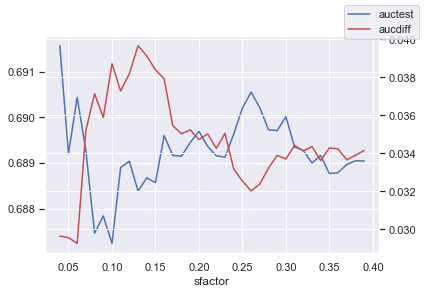

In [374]:
ax = pm.plot(x="sfactor", y="auctest", legend=False)
# ax = pm.plot(x="sfactor", y="auctrain", legend=False)
ax2 = ax.twinx()
pm.plot(x="sfactor", y="aucdiff", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

#### Best LR model with upsampling

In [92]:
ros = RandomOverSampler(sampling_strategy=0.27,random_state=42)
x_ros,y_ros = ros.fit_sample(x_train_2,y_train_2)
model_LG_4 = LogisticRegression()
model_LG_4.fit(x_ros,y_ros)

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
pred_train_LG_4 = model_LG_4.predict(x_ros)
pred_test_LG_4 = model_LG_4.predict(x_test)
pred_prob_train_LG_4 = model_LG_4.predict_proba(x_ros)[:,1]
pred_prob_test_LG_4 = model_LG_4.predict_proba(x_test_2)[:,1]

accuracy_train_LG_4 = accuracy_score(pred_train_LG_4,y_ros)
accuracy_test_LG_4 = accuracy_score(pred_test_LG_4,y_test_2)
fpr_train_LG_4, tpr_train_LG_4, _ = metrics.roc_curve(np.array(y_ros), model_LG_4.predict_proba(x_ros)[:,1])
auc_train_LG_4 = metrics.auc(fpr_train_LG_4,tpr_train_LG_4)

fpr_test_LG_4, tpr_test_LG_4, _ = metrics.roc_curve(np.array(y_test_2), model_LG_4.predict_proba(x_test_2)[:,1])
auc_test_LG_4 = metrics.auc(fpr_test_LG_4,tpr_test_LG_4)

In [94]:

print("Train Event Rate is %.2f%%"% ((np.sum(y_ros)/x_ros.shape[0])*100))
print("Test Event Rate is %.2f%%"% ((np.sum(y_test_2)/x_test_2.shape[0])*100))

print("Train Accuracy is : %.2f%%"% (accuracy_train_LG_4*100))
print("Test Accuracy is : %.2f%%"% (accuracy_test_LG_4*100))

print("Train AUC is : %.2f%%"% (auc_train_LG_4*100))
print("Test AUC is : %.2f%%"% (auc_test_LG_4*100))

Train Event Rate is 21.26%
Test Event Rate is 3.37%
Train Accuracy is : 79.98%
Test Accuracy is : 94.33%
Train AUC is : 72.26%
Test AUC is : 69.02%


In [95]:
y_hat_test_proba = model_LG_4.predict_proba(x_test_2)[: ][: , 1]
loan_data_targets_test_temp = y_test_2.copy()
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs_test = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs_test.columns = ['targets', 'prob']
df_actual_predicted_probs_test.index = y_test_2.index

In [96]:
print("Test ")
ks_table(df_actual_predicted_probs_test['targets'],df_actual_predicted_probs_test['prob'],10,True)


Test 
KS=Score is 29.19


,Tier,Observations,Min-Prob,Mean-Prob,Max-Prob,Events,Non-Events,Events-Rate(%),Cum-Events(%),Cum-Non-Events(%),KS-Score
0,1,1540,2.606425e-15,0.045303,0.070708,12,1528,0.779221,2.31,10.27,7.96
1,2,1540,7.072160e-02,0.085652,0.099757,28,1512,1.818182,7.71,20.43,12.72
2,3,1540,9.977220e-02,0.111063,0.121962,26,1514,1.688312,12.72,30.60,17.88
3,4,1540,1.219660e-01,0.132791,0.143279,34,1506,2.207792,19.27,40.72,21.45
4,5,1540,1.432951e-01,0.154208,0.165281,32,1508,2.077922,25.43,50.85,25.42
5,6,1540,1.652893e-01,0.177970,0.190862,33,1507,2.142857,31.79,60.98,29.19
6,7,1540,1.908722e-01,0.206518,0.224158,62,1478,4.025974,43.74,70.91,27.17
7,8,1540,2.241657e-01,0.245469,0.268603,66,1474,4.285714,56.45,80.82,24.37
8,9,1540,2.686269e-01,0.303923,0.349857,83,1457,5.389610,72.45,90.61,18.16
9,10,1541,3.499649e-01,0.472677,0.999917,143,1398,9.279689,100.00,100.00,0.00


### Fitting XGBM model without sampling

In [97]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV   
import gc # for deleting unused variables
%matplotlib inline

In [98]:
model_xgb_2 = XGBClassifier()
model_xgb_2.fit(x_train_2, y_train_2)


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [99]:
pred_train_xgb_2 = model_xgb_2.predict(x_train_2)
pred_test_xgb_2 = model_xgb_2.predict(x_test_2)
pred_prob_train_xgb_2 = model_xgb_2.predict_proba(x_train_2)[:,1]
pred_prob_test_xgb_2 = model_xgb_2.predict_proba(x_test_2)[:,1]

accuracy_train_xgb_2 = accuracy_score(pred_train_xgb_2,y_train_2)
accuracy_test_xgb_2 = accuracy_score(pred_test_xgb_2,y_test_2)
fpr_train_xgb_2, tpr_train_xgb_2, _ = metrics.roc_curve(np.array(y_train_2), model_xgb_2.predict_proba(x_train_2)[:,1])
auc_train_xgb_2 = metrics.auc(fpr_train_xgb_2,tpr_train_xgb_2)

fpr_test_xgb_2, tpr_test_xgb_2, _ = metrics.roc_curve(np.array(y_test_2), model_xgb_2.predict_proba(x_test_2)[:,1])
auc_test_xgb_2 = metrics.auc(fpr_test_xgb_2,tpr_test_xgb_2)

In [100]:
print("Event Rate is %.2f%%"% ((np.sum(y_train_2)/x_train_2.shape[0])*100))

print("Train Accuracy is : %.2f%%"% (accuracy_train_xgb_2*100))
print("Test Accuracy is : %.2f%%"% (accuracy_test_xgb_2*100))

print("Train AUC is : %.2f%%"% (auc_train_xgb_2*100))
print("Test AUC is : %.2f%%"% (auc_test_xgb_2*100))
print("The default model heavily overfits ")

Event Rate is 3.52%
Train Accuracy is : 97.82%
Test Accuracy is : 96.58%
Train AUC is : 98.71%
Test AUC is : 64.35%
The default model heavily overfits 


In [101]:
y_hat_test_proba = model_xgb_2.predict_proba(x_test_2)[: ][: , 1]
loan_data_targets_test_temp = y_test_2.copy()
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs_test = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs_test.columns = ['targets', 'prob']
df_actual_predicted_probs_test.index = y_test_2.index

In [102]:
print("Test ")
ks_table(df_actual_predicted_probs_test['targets'],df_actual_predicted_probs_test['prob'],10,True)


Test 
KS=Score is 22.23


,Tier,Observations,Min-Prob,Mean-Prob,Max-Prob,Events,Non-Events,Events-Rate(%),Cum-Events(%),Cum-Non-Events(%),KS-Score
0,1,1540,0.000005,0.000895,0.001814,18,1522,1.168831,3.47,10.23,6.76
1,2,1540,0.001814,0.002907,0.004046,29,1511,1.883117,9.06,20.38,11.32
2,3,1540,0.004053,0.005328,0.006709,44,1496,2.857143,17.53,30.43,12.90
3,4,1540,0.006713,0.008215,0.009818,24,1516,1.558442,22.16,40.62,18.46
4,5,1540,0.009819,0.011688,0.013753,33,1507,2.142857,28.52,50.75,22.23
5,6,1540,0.013756,0.016188,0.018865,58,1482,3.766234,39.69,60.70,21.01
6,7,1540,0.018865,0.022371,0.026328,58,1482,3.766234,50.87,70.66,19.79
7,8,1540,0.026333,0.031868,0.038393,74,1466,4.805195,65.13,80.51,15.38
8,9,1540,0.038395,0.049444,0.064920,62,1478,4.025974,77.07,90.44,13.37
9,10,1541,0.064993,0.128886,0.714259,119,1422,7.722258,100.00,100.00,0.00


## XGBoost with oversampling 


In [409]:

testauc_2 = []
trainauc_2 = []
aucdiff_2 = []
sfactor_2 = []
# testing for upsampling rates of 4% to 40% for train sample
# aucdiff.append
for sf in np.arange(0.04,0.4,0.01):
    ros = RandomOverSampler(sampling_strategy=sf,random_state=42)
    x_ros,y_ros = ros.fit_sample(x_train_2,y_train_2)
#     np.sum(y_ros)/x_ros.shape[0]

    model_xgb_i = XGBClassifier()
    model_xgb_i.fit(x_ros,y_ros)

    pred_train_xgb_i = model_xgb_i.predict(x_ros)
    pred_test_xgb_i = model_xgb_i.predict(x_test)
    pred_prob_train_xgb_i = model_xgb_i.predict_proba(x_ros)[:,1]
    pred_prob_test_xgb_i = model_xgb_i.predict_proba(x_test_2)[:,1]

    accuracy_train_xgb_i = accuracy_score(pred_train_xgb_i,y_ros)
    accuracy_test_xgb_i = accuracy_score(pred_test_xgb_i,y_test_2)
    fpr_train_xgb_i, tpr_train_xgb_i, _ = metrics.roc_curve(np.array(y_ros), model_xgb_i.predict_proba(x_ros)[:,1])
    auc_train_xgb_i = metrics.auc(fpr_train_xgb_i,tpr_train_xgb_i)

    fpr_test_xgb_i, tpr_test_xgb_i, _ = metrics.roc_curve(np.array(y_test_2), model_xgb_i.predict_proba(x_test_2)[:,1])
    auc_test_xgb_i = metrics.auc(fpr_test_xgb_i,tpr_test_xgb_i)
    
    auc_diff = (auc_train_xgb_i-auc_test_xgb_i)
   
    sfactor_2.append(sf)
    testauc_2.append(auc_test_xgb_i)
    trainauc_2.append(auc_train_xgb_i)
    aucdiff_2.append(auc_diff)
    
       
    
    print("For sampling factor ", sf)
    print("Train Event Rate is %.2f%%"% ((np.sum(y_ros)/x_ros.shape[0])*100))
    print("Test Event Rate is %.2f%%"% ((np.sum(y_test_2)/x_test_2.shape[0])*100))

    print("Train Accuracy is : %.2f%%"% (accuracy_train_xgb_i*100))
    print("Test Accuracy is : %.2f%%"% (accuracy_test_xgb_i*100))

    print("Train AUC is : %.2f%%"% (auc_train_xgb_i*100))
    print("Test AUC is : %.2f%%"% (auc_test_xgb_i*100))



C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.04
Train Event Rate is 3.84%
Test Event Rate is 3.37%
Train Accuracy is : 97.78%
Test Accuracy is : 96.57%
Train AUC is : 98.64%
Test AUC is : 63.18%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.05
Train Event Rate is 4.76%
Test Event Rate is 3.37%
Train Accuracy is : 97.79%
Test Accuracy is : 96.53%
Train AUC is : 99.13%
Test AUC is : 62.92%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.060000000000000005
Train Event Rate is 5.66%
Test Event Rate is 3.37%
Train Accuracy is : 97.78%
Test Accuracy is : 96.53%
Train AUC is : 99.32%
Test AUC is : 63.40%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.07
Train Event Rate is 6.54%
Test Event Rate is 3.37%
Train Accuracy is : 97.71%
Test Accuracy is : 96.50%
Train AUC is : 99.35%
Test AUC is : 62.36%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.08000000000000002
Train Event Rate is 7.41%
Test Event Rate is 3.37%
Train Accuracy is : 97.52%
Test Accuracy is : 96.49%
Train AUC is : 99.29%
Test AUC is : 62.09%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.09000000000000001
Train Event Rate is 8.26%
Test Event Rate is 3.37%
Train Accuracy is : 97.74%
Test Accuracy is : 96.47%
Train AUC is : 99.54%
Test AUC is : 62.81%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.1
Train Event Rate is 9.09%
Test Event Rate is 3.37%
Train Accuracy is : 97.66%
Test Accuracy is : 96.47%
Train AUC is : 99.47%
Test AUC is : 63.21%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.11000000000000001
Train Event Rate is 9.91%
Test Event Rate is 3.37%
Train Accuracy is : 97.55%
Test Accuracy is : 96.36%
Train AUC is : 99.48%
Test AUC is : 61.68%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.12000000000000002
Train Event Rate is 10.71%
Test Event Rate is 3.37%
Train Accuracy is : 97.23%
Test Accuracy is : 96.22%
Train AUC is : 99.39%
Test AUC is : 62.61%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.13000000000000003
Train Event Rate is 11.50%
Test Event Rate is 3.37%
Train Accuracy is : 97.64%
Test Accuracy is : 96.28%
Train AUC is : 99.61%
Test AUC is : 62.89%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.14
Train Event Rate is 12.28%
Test Event Rate is 3.37%
Train Accuracy is : 97.42%
Test Accuracy is : 96.27%
Train AUC is : 99.56%
Test AUC is : 63.72%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.15000000000000002
Train Event Rate is 13.04%
Test Event Rate is 3.37%
Train Accuracy is : 97.09%
Test Accuracy is : 96.16%
Train AUC is : 99.54%
Test AUC is : 62.44%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.16000000000000003
Train Event Rate is 13.79%
Test Event Rate is 3.37%
Train Accuracy is : 97.39%
Test Accuracy is : 96.21%
Train AUC is : 99.54%
Test AUC is : 62.86%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.17000000000000004
Train Event Rate is 14.53%
Test Event Rate is 3.37%
Train Accuracy is : 97.06%
Test Accuracy is : 95.95%
Train AUC is : 99.60%
Test AUC is : 62.67%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.18000000000000002
Train Event Rate is 15.25%
Test Event Rate is 3.37%
Train Accuracy is : 96.71%
Test Accuracy is : 96.10%
Train AUC is : 99.60%
Test AUC is : 63.74%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.19000000000000003
Train Event Rate is 15.97%
Test Event Rate is 3.37%
Train Accuracy is : 97.28%
Test Accuracy is : 96.06%
Train AUC is : 99.70%
Test AUC is : 62.65%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.20000000000000004
Train Event Rate is 16.67%
Test Event Rate is 3.37%
Train Accuracy is : 97.20%
Test Accuracy is : 95.91%
Train AUC is : 99.74%
Test AUC is : 62.88%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.21000000000000005
Train Event Rate is 17.35%
Test Event Rate is 3.37%
Train Accuracy is : 97.47%
Test Accuracy is : 96.02%
Train AUC is : 99.74%
Test AUC is : 62.52%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.22000000000000006
Train Event Rate is 18.03%
Test Event Rate is 3.37%
Train Accuracy is : 97.59%
Test Accuracy is : 95.92%
Train AUC is : 99.78%
Test AUC is : 62.89%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.23000000000000004
Train Event Rate is 18.70%
Test Event Rate is 3.37%
Train Accuracy is : 97.47%
Test Accuracy is : 95.81%
Train AUC is : 99.75%
Test AUC is : 62.89%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.24000000000000005
Train Event Rate is 19.35%
Test Event Rate is 3.37%
Train Accuracy is : 97.50%
Test Accuracy is : 95.77%
Train AUC is : 99.78%
Test AUC is : 62.81%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.25000000000000006
Train Event Rate is 20.00%
Test Event Rate is 3.37%
Train Accuracy is : 97.54%
Test Accuracy is : 95.81%
Train AUC is : 99.74%
Test AUC is : 62.46%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.26
Train Event Rate is 20.63%
Test Event Rate is 3.37%
Train Accuracy is : 97.17%
Test Accuracy is : 95.74%
Train AUC is : 99.69%
Test AUC is : 62.85%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.27
Train Event Rate is 21.26%
Test Event Rate is 3.37%
Train Accuracy is : 97.24%
Test Accuracy is : 95.79%
Train AUC is : 99.71%
Test AUC is : 61.32%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.28
Train Event Rate is 21.87%
Test Event Rate is 3.37%
Train Accuracy is : 97.37%
Test Accuracy is : 95.68%
Train AUC is : 99.71%
Test AUC is : 63.03%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.29000000000000004
Train Event Rate is 22.48%
Test Event Rate is 3.37%
Train Accuracy is : 97.51%
Test Accuracy is : 95.57%
Train AUC is : 99.74%
Test AUC is : 62.58%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.30000000000000004
Train Event Rate is 23.08%
Test Event Rate is 3.37%
Train Accuracy is : 97.37%
Test Accuracy is : 95.55%
Train AUC is : 99.72%
Test AUC is : 62.51%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.31000000000000005
Train Event Rate is 23.66%
Test Event Rate is 3.37%
Train Accuracy is : 97.09%
Test Accuracy is : 95.47%
Train AUC is : 99.64%
Test AUC is : 62.12%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.32
Train Event Rate is 24.24%
Test Event Rate is 3.37%
Train Accuracy is : 97.26%
Test Accuracy is : 95.41%
Train AUC is : 99.70%
Test AUC is : 62.33%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.33
Train Event Rate is 24.81%
Test Event Rate is 3.37%
Train Accuracy is : 97.32%
Test Accuracy is : 95.23%
Train AUC is : 99.73%
Test AUC is : 63.09%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.34
Train Event Rate is 25.37%
Test Event Rate is 3.37%
Train Accuracy is : 97.32%
Test Accuracy is : 95.27%
Train AUC is : 99.76%
Test AUC is : 63.26%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.35000000000000003
Train Event Rate is 25.92%
Test Event Rate is 3.37%
Train Accuracy is : 97.70%
Test Accuracy is : 95.19%
Train AUC is : 99.77%
Test AUC is : 62.92%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.36000000000000004
Train Event Rate is 26.47%
Test Event Rate is 3.37%
Train Accuracy is : 98.11%
Test Accuracy is : 95.23%
Train AUC is : 99.83%
Test AUC is : 61.81%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.37000000000000005
Train Event Rate is 27.01%
Test Event Rate is 3.37%
Train Accuracy is : 97.35%
Test Accuracy is : 94.94%
Train AUC is : 99.72%
Test AUC is : 63.06%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.38000000000000006
Train Event Rate is 27.53%
Test Event Rate is 3.37%
Train Accuracy is : 97.78%
Test Accuracy is : 94.90%
Train AUC is : 99.79%
Test AUC is : 62.34%


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For sampling factor  0.39000000000000007
Train Event Rate is 28.06%
Test Event Rate is 3.37%
Train Accuracy is : 98.32%
Test Accuracy is : 94.84%
Train AUC is : 99.83%
Test AUC is : 61.72%


In [410]:
perf_metrics_2 = {}
perf_metrics_2['sfactor'] = sfactor_2
perf_metrics_2['auctest'] = testauc_2
perf_metrics_2['auctrain'] = trainauc_2
perf_metrics_2['aucdiff'] = aucdiff_2

In [411]:
pm_xgb = pd.DataFrame.from_dict(perf_metrics_2)
pm_xgb.sort_values('aucdiff').head()


,sfactor,auctest,auctrain,aucdiff
0,0.04,0.631797,0.986420,0.354623
10,0.14,0.637166,0.995638,0.358472
14,0.18,0.637358,0.996021,0.358663
2,0.06,0.634043,0.993165,0.359123
1,0.05,0.629242,0.991337,0.362095


Oversampling strategies are not giving the best results


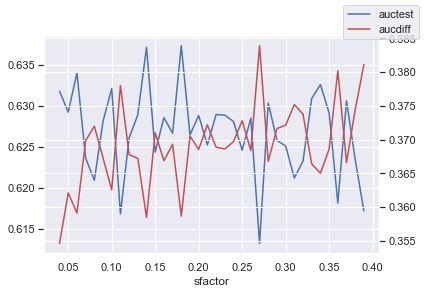

In [413]:
print("Oversampling strategies are not giving the best results")
ax = pm_xgb.plot(x="sfactor", y="auctest", legend=False)
# ax = pm.plot(x="sfactor", y="auctrain", legend=False)
ax2 = ax.twinx()
pm_xgb.plot(x="sfactor", y="aucdiff", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

### Fitting the XGBM model on best sampling strategy (overfitting)

In [103]:
ros = RandomOverSampler(sampling_strategy=0.14,random_state=42)
x_ros,y_ros = ros.fit_sample(x_train_2,y_train_2)

In [104]:
model_xgb_os = XGBClassifier()
model_xgb_os.fit(x_ros,y_ros)

pred_train_xgb_os = model_xgb_os.predict(x_ros)
pred_test_xgb_os = model_xgb_os.predict(x_test)
pred_prob_train_xgb_os = model_xgb_os.predict_proba(x_ros)[:,1]
pred_prob_test_xgb_os = model_xgb_os.predict_proba(x_test_2)[:,1]

accuracy_train_xgb_os = accuracy_score(pred_train_xgb_os,y_ros)
accuracy_test_xgb_os = accuracy_score(pred_test_xgb_os,y_test_2)
fpr_train_xgb_os, tpr_train_xgb_os, _ = metrics.roc_curve(np.array(y_ros), model_xgb_os.predict_proba(x_ros)[:,1])
auc_train_xgb_os = metrics.auc(fpr_train_xgb_os,tpr_train_xgb_os)

fpr_test_xgb_os, tpr_test_xgb_os, _ = metrics.roc_curve(np.array(y_test_2), model_xgb_os.predict_proba(x_test_2)[:,1])
auc_test_xgb_os = metrics.auc(fpr_test_xgb_os,tpr_test_xgb_os)

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
print("For sampling factor ", 0.14)
print("Train Event Rate is %.2f%%"% ((np.sum(y_ros)/x_ros.shape[0])*100))
print("Test Event Rate is %.2f%%"% ((np.sum(y_test_2)/x_test_2.shape[0])*100))

print("Train Accuracy is : %.2f%%"% (accuracy_train_xgb_os*100))
print("Test Accuracy is : %.2f%%"% (accuracy_test_xgb_os*100))

print("Train AUC is : %.2f%%"% (auc_train_xgb_os*100))
print("Test AUC is : %.2f%%"% (auc_test_xgb_os*100))

For sampling factor  0.14
Train Event Rate is 12.28%
Test Event Rate is 3.37%
Train Accuracy is : 97.42%
Test Accuracy is : 96.27%
Train AUC is : 99.56%
Test AUC is : 63.72%


In [107]:
y_hat_test_proba = model_xgb_os.predict_proba(x_test_2)[: ][: , 1]
loan_data_targets_test_temp = y_test_2.copy()
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs_test = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs_test.columns = ['targets', 'prob']
df_actual_predicted_probs_test.index = y_test_2.index

In [108]:
print("Test ")
ks_table(df_actual_predicted_probs_test['targets'],df_actual_predicted_probs_test['prob'],10,True)


Test 
KS=Score is 18.8


,Tier,Observations,Min-Prob,Mean-Prob,Max-Prob,Events,Non-Events,Events-Rate(%),Cum-Events(%),Cum-Non-Events(%),KS-Score
0,1,1540,0.000005,0.001489,0.003151,21,1519,1.363636,4.05,10.21,6.16
1,2,1540,0.003155,0.005240,0.007512,31,1509,2.012987,10.02,20.35,10.33
2,3,1540,0.007512,0.010072,0.012896,28,1512,1.818182,15.41,30.51,15.10
3,4,1540,0.012901,0.015935,0.019071,45,1495,2.922078,24.08,40.55,16.47
4,5,1540,0.019072,0.023280,0.027826,44,1496,2.857143,32.56,50.60,18.04
5,6,1540,0.027828,0.033470,0.039730,52,1488,3.376623,42.58,60.60,18.02
6,7,1540,0.039734,0.047909,0.056842,48,1492,3.116883,51.83,70.63,18.80
7,8,1540,0.056849,0.069605,0.084969,60,1480,3.896104,63.39,80.57,17.18
8,9,1540,0.084975,0.109910,0.143063,80,1460,5.194805,78.81,90.38,11.57
9,10,1541,0.143073,0.251709,0.973916,110,1431,7.138222,100.00,100.00,0.00


### XGBoost with grid search 

In [416]:
scale_pos_weight_guess = (x_train_2.shape[0]-np.sum(y_train_2['30_DPD_F3M']))/np.sum(y_train_2['30_DPD_F3M'])
print(scale_pos_weight_guess )
print(scale_pos_weight_guess/2 )

27.429588607594937
13.714794303797468


In [419]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid_4 = {'learning_rate': [0.01, 0.02], 
#              'subsample': [0.3, 0.6],
             'n_estimators': [500,1000],
                'max_depth' : [3,5],
             'min_samples_split' : [32,64],
             'min_samples_leaf' : [10,20],
             'max_features' : ['auto', 'sqrt'],
               'scale_pos_weight': [1, scale_pos_weight_guess/2 ,scale_pos_weight_guess]}


# specify model
xgb_model_xgb4 = XGBClassifier()

# set up GridSearchCV()
model_cv_4 = GridSearchCV(estimator = xgb_model_xgb4,
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                       refit='AUC')      



In [420]:
model_cv_4.fit(x_train_2, y_train_2)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0

In [436]:
print(model_cv_4.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 32, 'n_estimators': 500}


In [422]:
xgb_model_4 =  XGBClassifier(**model_cv_4.best_params_)
xgb_model_4.fit(x_train_2, y_train_2)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              max_features='auto', min_child_weight=1, min_samples_leaf=10,
              min_samples_split=32, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [435]:
# import pickle
# pickle.dump(xgb_model_4, open(r'C:\Users\siddh\Desktop\Syneptic Assignment\xgb_model_GS_30dpd_1.sav', 'wb'))

In [423]:
# train preds
y_pred_prob_train_xgb4= xgb_model_4.predict_proba(x_train_2)
y_pred_train_xgb4 = xgb_model_4.predict(x_train_2)

In [424]:
# tst preds
y_pred_prob_xgb4= xgb_model_4.predict_proba(x_test_2)
y_pred_xgb4 = xgb_model_4.predict(x_test_2)

In [426]:
roc_train_xgb_4 = metrics.roc_auc_score(y_train_2, y_pred_prob_train_xgb4[:, 1])
print("Train AUC for XGB with grid search : %.2f%%" % (roc_train_xgb_4 * 100.0))
roc_test_xgb_4 = metrics.roc_auc_score(y_test_2, y_pred_prob_xgb4[:, 1])
print("Test AUC for XGB with grid search : %.2f%%" % (roc_test_xgb_2 * 100.0))
accuracy_train_xgb_4 = accuracy_score(y_pred_train_xgb4,y_train_2)
print("Train accuracy for XGB with grid search : %.2f%%"% (accuracy_train_xgb_4*100.0))
accuracy_test_xgb_4 = accuracy_score(y_pred_xgb4,y_test_2)
print("Test accuracy for XGB with grid search : %.2f%%" % (accuracy_test_xgb_4*100.0))

Train AUC for XGB with grid search : 81.27%
Test AUC for XGB with grid search : 63.79%
Train accuracy for XGB with grid search : 96.50%
Test accuracy for XGB with grid search : 96.63%


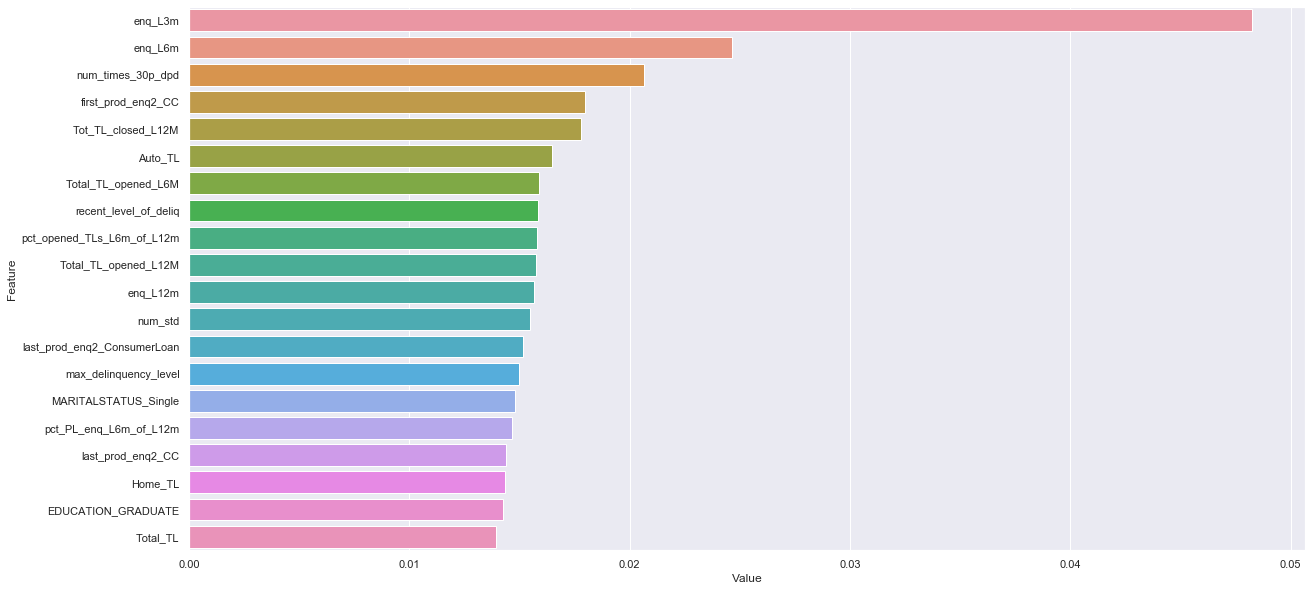

In [427]:
fig, ax = plt.subplots(figsize=(20, 10))
feature_imp_xgb_4 = pd.DataFrame(sorted(zip(xgb_model_4.feature_importances_,x_train_2.columns)), columns=['Value','Feature'])
feature_imp_xgb_4 = feature_imp_xgb_4.sort_values('Value',ascending=False).reset_index(drop=True)
feature_imp_smpl = feature_imp_xgb_4.iloc[:20,:]
ax = sns.barplot(x="Value", y="Feature", data=feature_imp_smpl)

In [428]:
fpr_train_xgb_4, tpr_train_xgb_4, _ = metrics.roc_curve(np.array(y_train_2), xgb_model_4.predict_proba(x_train)[:,1])
fpr_test_xgb_4, tpr_test_xgb_4, _ = metrics.roc_curve(np.array(y_test_2), xgb_model_4.predict_proba(x_test)[:,1])

In [429]:
y_hat_train_proba = xgb_model_4.predict_proba(x_train_2)[: ][: , 1]
loan_data_targets_train_temp = y_train_2.copy()
loan_data_targets_train_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs = pd.concat([loan_data_targets_train_temp, pd.DataFrame(y_hat_train_proba)], axis = 1)
df_actual_predicted_probs.columns = ['targets', 'prob']
df_actual_predicted_probs.index = y_train_2.index

In [430]:
print("Train KS ")
ks_table(df_actual_predicted_probs['targets'],df_actual_predicted_probs['prob'],10,True)

Train KS 
KS=Score is 46.15


,Tier,Observations,Min-Prob,Mean-Prob,Max-Prob,Events,Non-Events,Events-Rate(%),Cum-Events(%),Cum-Non-Events(%),KS-Score
0,1,3593,0.006474,0.013490,0.016804,1,3592,0.027832,0.08,10.36,10.28
1,2,3594,0.016805,0.018787,0.020371,14,3580,0.389538,1.19,20.69,19.50
2,3,3593,0.020372,0.021677,0.022858,38,3555,1.057612,4.19,30.94,26.75
3,4,3594,0.022858,0.024179,0.025611,51,3543,1.419032,8.23,41.16,32.93
4,5,3593,0.025613,0.027502,0.029803,56,3537,1.558586,12.66,51.36,38.70
5,6,3594,0.029805,0.032386,0.035079,66,3528,1.836394,17.88,61.54,43.66
6,7,3593,0.035080,0.037724,0.040732,96,3497,2.671862,25.47,71.62,46.15
7,8,3594,0.040735,0.044683,0.049560,139,3455,3.867557,36.47,81.59,45.12
8,9,3593,0.049564,0.056971,0.066218,199,3394,5.538547,52.22,91.38,39.16
9,10,3594,0.066219,0.105264,0.607793,604,2990,16.805787,100.00,100.00,0.00


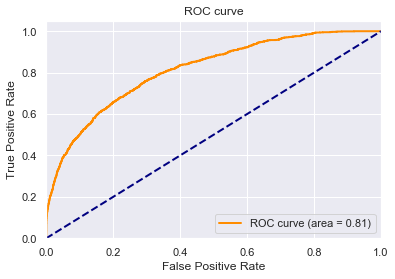

In [431]:
#Train ROC
roc_curve(fpr_train_xgb_4,tpr_train_xgb_4)

In [432]:
y_hat_test_proba = xgb_model_4.predict_proba(x_test_2)[: ][: , 1]
loan_data_targets_test_temp = y_test_2.copy()
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs.columns = ['targets', 'prob']
df_actual_predicted_probs.index = y_test_2.index

In [433]:
print("Test KS ")
ks_table(df_actual_predicted_probs['targets'],df_actual_predicted_probs['prob'],10,True)

Test KS 
KS=Score is 27.37


,Tier,Observations,Min-Prob,Mean-Prob,Max-Prob,Events,Non-Events,Events-Rate(%),Cum-Events(%),Cum-Non-Events(%),KS-Score
0,1,1540,0.006614,0.013769,0.016998,14,1526,0.909091,2.70,10.25,7.55
1,2,1540,0.017001,0.018923,0.020479,17,1523,1.103896,5.97,20.49,14.52
2,3,1540,0.020479,0.021784,0.022997,24,1516,1.558442,10.60,30.67,20.07
3,4,1540,0.022998,0.024398,0.025899,25,1515,1.623377,15.41,40.85,25.44
4,5,1540,0.025899,0.027862,0.030232,46,1494,2.987013,24.28,50.89,26.61
5,6,1540,0.030233,0.032848,0.035374,50,1490,3.246753,33.91,60.91,27.00
6,7,1540,0.035381,0.038030,0.041061,50,1490,3.246753,43.55,70.92,27.37
7,8,1540,0.041065,0.044970,0.049803,70,1470,4.545455,57.03,80.80,23.77
8,9,1540,0.049808,0.057156,0.066730,72,1468,4.675325,70.91,90.66,19.75
9,10,1541,0.066743,0.102462,0.375105,151,1390,9.798832,100.00,100.00,0.00


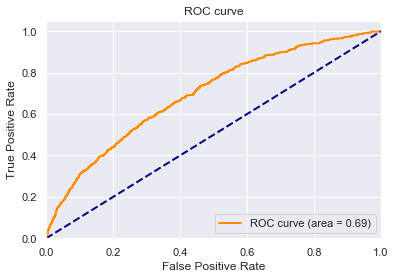

In [434]:
# Test ROC 
roc_curve(fpr_test_xgb_4,tpr_test_xgb_4)